In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from core.utils.plot_utils import saveallforms
import seaborn as sns
from core.utils.plot_utils import saveallforms

c:\Users\ponce\.conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
syndir = join(figroot, "synopsis")
synfigdir = f"E:\OneDrive - Harvard University\BigGAN_Hessian\synopsis\Figure"
tuning_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis.pkl"))
tuning_stats_synopsis_df_fillmissing = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis_fill_missing.pkl"))
evol_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_evol_stats_synopsis.pkl"))

In [4]:
tuning_stats_synopsis_df = tuning_stats_synopsis_df_fillmissing

In [5]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['Exp_id'] = tuning_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)
evol_stats_synopsis_df['Exp_id'] = evol_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)

In [53]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

### Process the Evolution Data


In [ ]:
list(evol_stats_synopsis_df.columns)

['ChanQual',
 'Exp_collection',
 'Expi',
 'WebCam',
 'comments',
 'ephysFN',
 'expControlFN',
 'pref_chan',
 'pref_unit',
 'stim_size',
 'stimuli',
 'Animal',
 'init_resp_thr0',
 'last_resp_thr0',
 'max_resp_thr0',
 'max_evol_resp_thr0',
 'max_resp_thr0_blocknum',
 'lastinit_thr0_tval',
 'lastinit_thr0_pval',
 'lastinit_thr0_dof',
 'maxinit_thr0_tval',
 'maxinit_thr0_pval',
 'maxinit_thr0_dof',
 'init_resp_thr1',
 'last_resp_thr1',
 'max_resp_thr1',
 'max_evol_resp_thr1',
 'max_resp_thr1_blocknum',
 'lastinit_thr1_tval',
 'lastinit_thr1_pval',
 'lastinit_thr1_dof',
 'maxinit_thr1_tval',
 'maxinit_thr1_pval',
 'maxinit_thr1_dof',
 'mean_ref_resp',
 'max_ref_resp',
 'max_ref_resp_imgname',
 'max_evol_resp',
 'max_evol_resp_blockidx',
 'max_evolref_resp']

In [ ]:
evol_stats_synopsis_df.head()

ChanQual             Exp_collection  Expi  WebCam  \
0       NaN  BigGAN_FC6;BigGAN_Hessian   1.0     NaN   
1       NaN  BigGAN_FC6;BigGAN_Hessian   2.0     NaN   
2       NaN  BigGAN_FC6;BigGAN_Hessian   3.0     NaN   
3       NaN  BigGAN_FC6;BigGAN_Hessian   4.0     NaN   
4       NaN  BigGAN_FC6;BigGAN_Hessian   5.0     NaN   

                                            comments            ephysFN  \
0  002 generate biggan\n 91 (0 0) 2 2 cmaes SU 1/...  Caos-12022024-002   
1  Let's try chan 94, with hash\n 005 biggan\n 94...  Caos-12022024-005   
2  002 biggan\nstarted at 218 PM\n71 (0 0) 2 2 CM...  Caos-12042024-002   
3  Will try another biggan\nch 72 ( 0 0) 2 1 CMAE...  Caos-12042024-006   
4  Trying biggan again with SU in 92\n92 (0 0) 2 ...  Caos-12092024-003   

                         expControlFN  pref_chan  pref_unit  stim_size  ...  \
0  241202_143902_Caos_generate_BigGAN       91.0        2.0        2.0  ...   
1  241202_153847_Caos_generate_BigGAN       94.0        1.0        2.0  ...   
2  241204_141711_Caos_generate_BigGAN       71.0        2.0        2.0  ...   
3  241204_151045_Caos_generate_BigGAN       72.0        1.0        2.0  ...   
4  241209_142223_Caos_generate_BigGAN       92.0        2.0        2.0  ...   

  lastinit_thr1_dof maxinit_thr1_tval  maxinit_thr1_pval  maxinit_thr1_dof  \
0               112          8.482987       1.013888e-13               112   
1               101          7.445259       1.988915e-11               114   
2               113          8.724390       2.694921e-14               113   
3               113          6.519268       2.054053e-09               113   
4               113          8.511491       8.270839e-14               113   

   mean_ref_resp  max_ref_resp                   max_ref_resp_imgname  \
0       3.807249     17.979944  ILSVRC2012_val_00011961_thread000_nat   
1      43.216322     52.606561                   kd_624_thread000_nat   
2      23.309888     41.803610  ILSVRC2012_val_00021090_thread000_nat   
3      96.959927    144.844102  ILSVRC2012_val_00011961_thread001_nat   
4       1.014855      3.171352  ILSVRC2012_val_00018202_thread001_nat   

   max_evol_resp  max_evol_resp_blockidx  max_evolref_resp  
0      55.050235                 (0, 36)         55.050235  
1      91.166523                 (1, 13)         91.166523  
2      80.872121                  (1, 9)         80.872121  
3     160.016263                 (1, 23)        160.016263  
4      22.827308                  (1, 9)         22.827308  

[5 rows x 40 columns]

### Process the Tuning Axes

In [4]:
np.unique(tuning_stats_synopsis_df.lin_dist_num.values, return_counts=True)

(array([ 1,  3,  4,  5,  6,  7,  8,  9, 11], dtype=int64),
 array([  4,   1,   2,   4,  10,   5, 309, 738, 172], dtype=int64))

In [5]:
tuning_stats_synopsis_df.head()

space_name  eig_id    F_value       p_value                      stats_str  \
0      noise     0.0   3.465323  1.793685e-03   F-val: 3.47 | p-val: 1.8e-03   
1      noise     1.0   4.688895  8.846987e-05   F-val: 4.69 | p-val: 8.8e-05   
2      noise     2.0   2.228305  3.361004e-02   F-val: 2.23 | p-val: 3.4e-02   
3      noise     3.0  13.480611  4.671396e-12  F-val: 13.48 | p-val: 4.7e-12   
4      noise     5.0   3.396013  2.195186e-03   F-val: 3.40 | p-val: 2.2e-03   

                                        lin_dist_set  lin_dist_num  \
0  [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...             9   
1  [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...             9   
2  [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...             9   
3  [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...             9   
4  [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...             9   

                               avg_resp_per_lin_dist  max_resp_lin_dist  \
0  [3.995903730392456, 1.479964256286621, 4.41176...              -0.16   
1  [8.657791137695312, 7.628445148468018, 18.1388...              -0.24   
2  [11.028430938720703, 6.682855129241943, 0.7399...               0.16   
3  [0.0, 3.3299193382263184, 26.63204002380371, 4...              -0.24   
4  [2.2199466228485107, 10.055503845214844, 2.959...               0.40   

   max_resp_val Animal  Expi            ephysFN  \
0     16.845739   Caos   1.0  Caos-12022024-003   
1     18.138840   Caos   1.0  Caos-12022024-003   
2     11.423381   Caos   1.0  Caos-12022024-003   
3     26.632040   Caos   1.0  Caos-12022024-003   
4     10.359751   Caos   1.0  Caos-12022024-003   

                                             stimuli  prefchan  prefunit  
0  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      91.0       2.0  
1  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      91.0       2.0  
2  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      91.0       2.0  
3  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      91.0       2.0  
4  N:\Stimuli\Evolutions\2024\2024-12-02-Ev-Caos-...      91.0       2.0

In [6]:
np.unique(tuning_stats_synopsis_df_fillmissing.lin_dist_num.values, return_counts=True)

(array([ 1,  4,  5,  6,  7,  8,  9, 11], dtype=int64),
 array([   4,    1,    2,    5,    9,   17, 1035,  172], dtype=int64))

In [7]:
# Filter rows where lin_dist_num == 8
filtered_df = tuning_stats_synopsis_df_fillmissing[tuning_stats_synopsis_df_fillmissing['lin_dist_num'] == 8]
# Check if 0.0 is missing from lin_dist_set using a lambda function
missing_zero = filtered_df['lin_dist_set'].apply(lambda x: 0.0 not in x)
print(f"0.0 is missing from lin_dist_set for lin_dist_num == 8: {missing_zero.all()}")


0.0 is missing from lin_dist_set for lin_dist_num == 8: False


In [8]:
tuning_stats_synopsis_df = tuning_stats_synopsis_df_fillmissing

In [22]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

### Solely Hessian Experimental Analysis

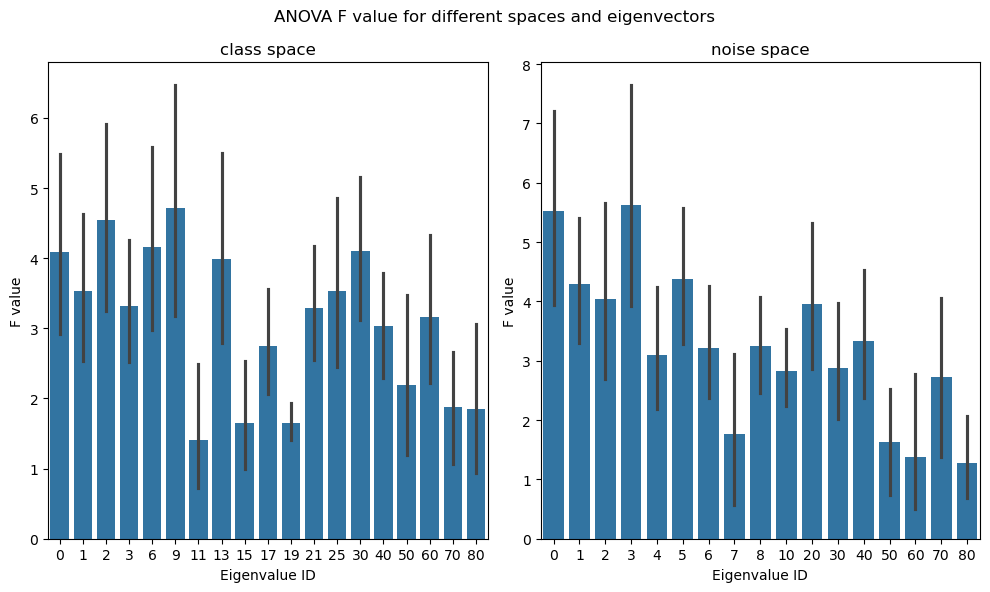

In [21]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0])
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('F value')

sns.barplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1])
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('F value')
fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()

In [22]:
len(tuning_stats_synopsis_df[["Animal", "Expi"]].drop_duplicates())

52

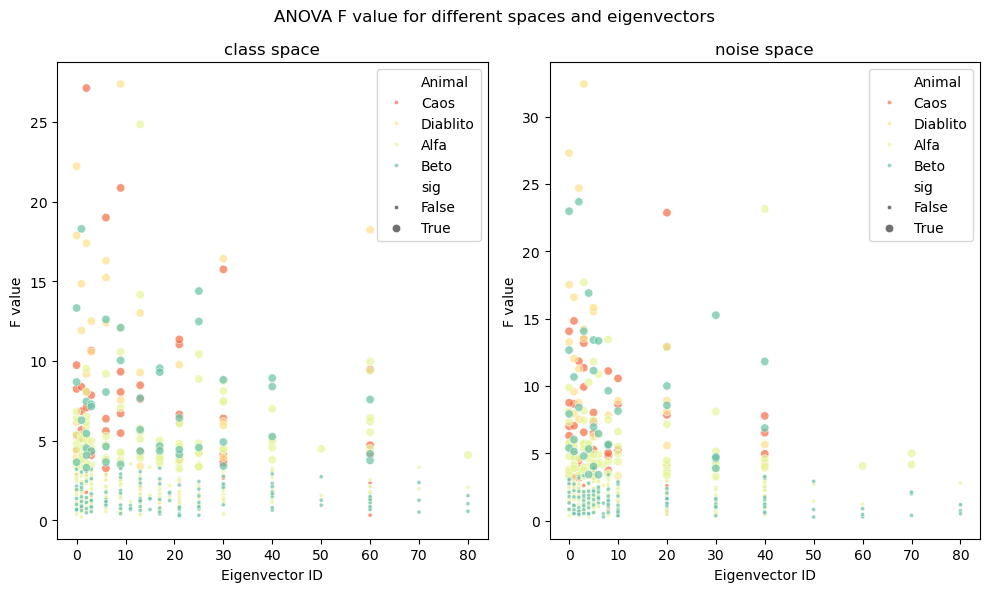

In [23]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors')
plt.tight_layout()
plt.show()



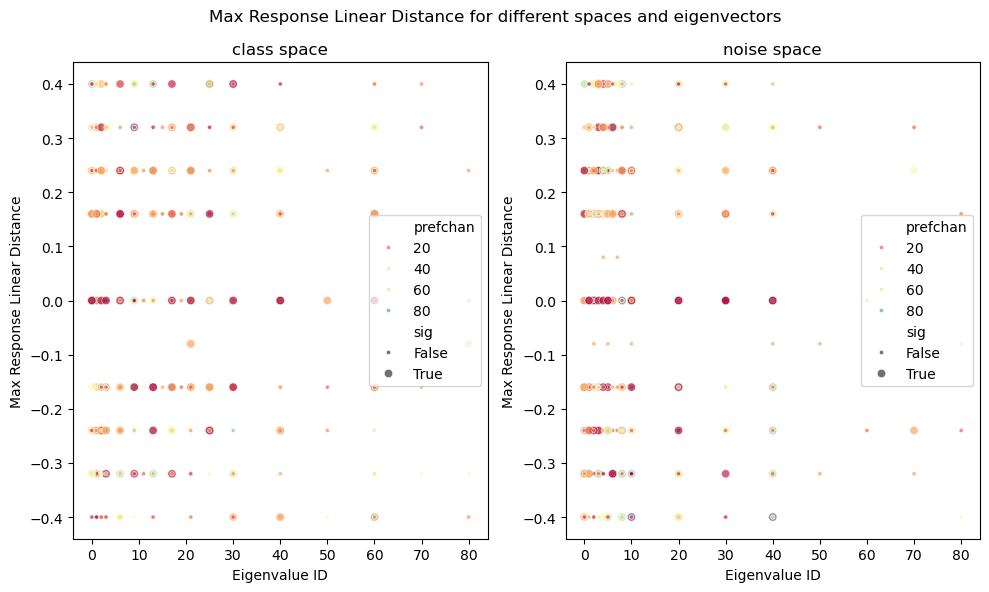

In [25]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors')
plt.tight_layout()
plt.show()
# %%

## Evolution Hessian interaction analysis

In [67]:
# find masks of evolution that succeed on thread 1 
success_str = "last - init p < 0.01"
BigGAN_success_explist = evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01")['Exp_id']
# find the corresponding masks in tuning stats
BigGAN_success_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id in @BigGAN_success_explist")
BigGAN_fail_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id not in @BigGAN_success_explist")
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# find the corresponding masks in tuning stats
print(f"BigGAN success mask shape: {BigGAN_success_mask_tuning_stats.shape}")
print(f"BigGAN fail mask shape: {BigGAN_fail_mask_tuning_stats.shape}")

BigGAN success mask shape: (714, 24)
BigGAN fail mask shape: (531, 24)


In [80]:
print("BigGAN success count: ", evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01").Exp_id.count())
print("BigGAN fail count: ", evol_stats_synopsis_df.query("lastinit_thr1_pval > 0.01").Exp_id.count())

BigGAN success count:  32
BigGAN fail count:  20


In [77]:
F_pval_threshold = 0.01
with open(join(synfigdir, 'tuning_axis_anova_signif_stats_summary.txt'), 'w') as f:
    for F_pval_threshold in [0.001, 0.005, 0.01, 0.05]:
        print(f"F_pval_threshold: {F_pval_threshold}")
        f.write(f"F_pval_threshold: {F_pval_threshold}\n")
        tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
        stats = tuning_stats_synopsis_df[common_axis_mask].groupby("is_BigGAN_evol_success").agg({"sig": ["mean", "sum", "count"], "F_value": "mean", })
        print(stats)
        f.write(str(stats) + "\n\n")

F_pval_threshold: 0.001
                             sig              F_value
                            mean  sum count      mean
is_BigGAN_evol_success                               
False                   0.107798   47   436  2.180051
True                    0.400000  264   660  4.813855
F_pval_threshold: 0.005
                             sig              F_value
                            mean  sum count      mean
is_BigGAN_evol_success                               
False                   0.192661   84   436  2.180051
True                    0.481818  318   660  4.813855
F_pval_threshold: 0.01
                             sig              F_value
                            mean  sum count      mean
is_BigGAN_evol_success                               
False                   0.236239  103   436  2.180051
True                    0.518182  342   660  4.813855
F_pval_threshold: 0.05
                             sig              F_value
                            mean  sum coun

### Peak location tests

In [87]:
from scipy.stats import ttest_ind, wilcoxon, ranksums

In [93]:
F_pval_threshold = 0.01
tuning_stats_synopsis_df["max_resp_lin_dist_abs"] = np.abs(tuning_stats_synopsis_df["max_resp_lin_dist"])
# with open(join(synfigdir, 'tuning_axis_anova_signif_stats_summary.txt'), 'w') as f:
for F_pval_threshold in [0.001, 0.005, 0.01, 0.05]:
    print(f"F_pval_threshold: {F_pval_threshold}")
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
    # perform independent t-test and the non parametric wilcoxon test
    sig_success_split = tuning_stats_synopsis_df[common_axis_mask].query("sig and is_BigGAN_evol_success")["max_resp_lin_dist_abs"]
    sig_fail_split = tuning_stats_synopsis_df[common_axis_mask].query("sig and not is_BigGAN_evol_success")["max_resp_lin_dist_abs"]
    t_stat, p_val = ttest_ind(sig_success_split, sig_fail_split)
    wilcoxon_stat, wilcoxon_p_val = ranksums(sig_success_split, sig_fail_split)
    dof = len(sig_success_split) + len(sig_fail_split) - 2
    print(f"sig_success : {sig_success_split.mean():.3f}+-{sig_success_split.sem():.3f} (N={len(sig_success_split)})", end=" | ")
    print(f"sig_fail: {sig_fail_split.mean():.3f}+-{sig_fail_split.sem():.3f} (N={len(sig_fail_split)})")
    stats = {"t_stat": t_stat, "t_pval": p_val, "wilcoxon_stat": wilcoxon_stat, "wilcoxon_pval": wilcoxon_p_val, "dof": dof}
    print(stats)


F_pval_threshold: 0.001
sig_success : 0.175+-0.008 (N=264) | sig_fail: 0.255+-0.016 (N=47)
{'t_stat': -4.217534610152068, 't_pval': 3.2484158458933986e-05, 'wilcoxon_stat': -3.9358370334713473, 'wilcoxon_pval': 8.29072211348361e-05, 'dof': 309}
F_pval_threshold: 0.005
sig_success : 0.174+-0.007 (N=318) | sig_fail: 0.252+-0.012 (N=84)
{'t_stat': -5.341264106691028, 't_pval': 1.5520414502320551e-07, 'wilcoxon_stat': -5.094800900366569, 'wilcoxon_pval': 3.49107946572899e-07, 'dof': 400}
F_pval_threshold: 0.01
sig_success : 0.178+-0.007 (N=342) | sig_fail: 0.253+-0.011 (N=103)
{'t_stat': -5.577474145985409, 't_pval': 4.252288345599018e-08, 'wilcoxon_stat': -5.262549804166678, 'wilcoxon_pval': 1.420711611728865e-07, 'dof': 443}
F_pval_threshold: 0.05
sig_success : 0.185+-0.006 (N=424) | sig_fail: 0.249+-0.008 (N=166)
{'t_stat': -6.098308189023719, 't_pval': 1.942873174413483e-09, 'wilcoxon_stat': -5.521179936676984, 'wilcoxon_pval': 3.3673072903773934e-08, 'dof': 588}


### F value of ANOVA of tuning axis as function of space, eigen order, and success vs fail evolution

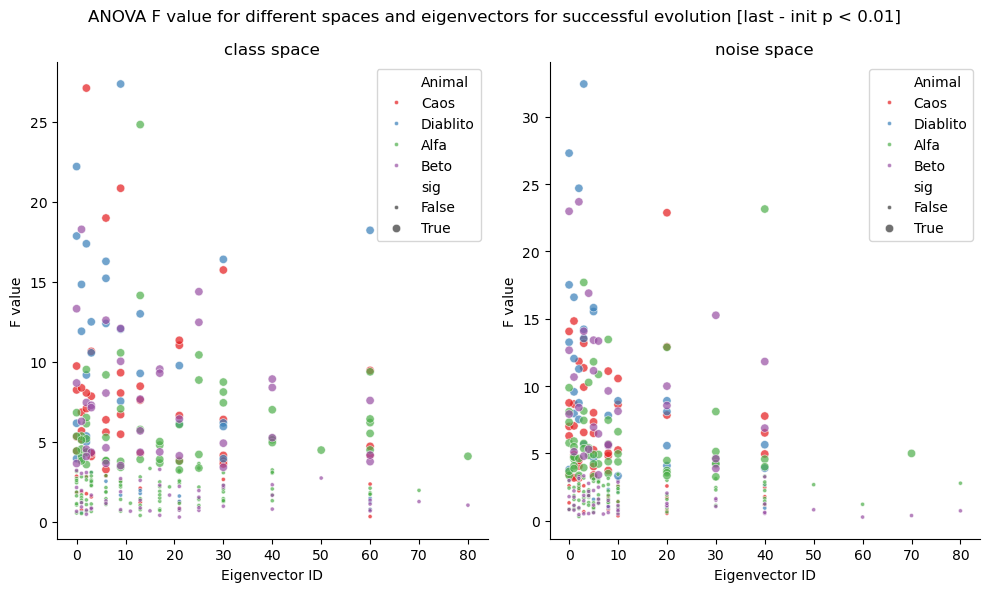

In [29]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
F_pval_threshold = 0.005
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle(f'ANOVA F value for different spaces and eigenvectors for successful evolution [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

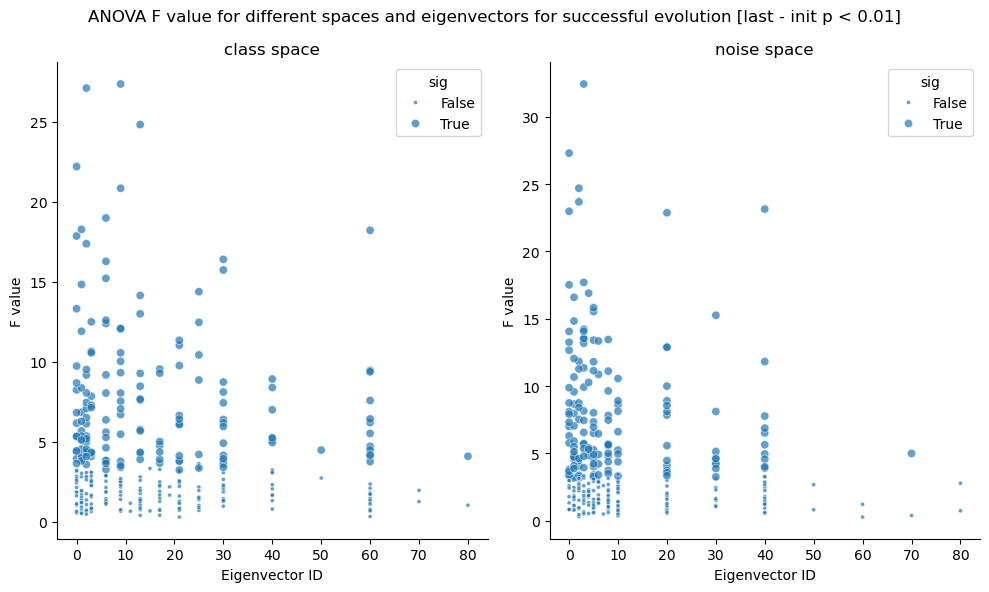

In [30]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
F_pval_threshold = 0.005
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < F_pval_threshold
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle(f'ANOVA F value for different spaces and eigenvectors for successful evolution [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

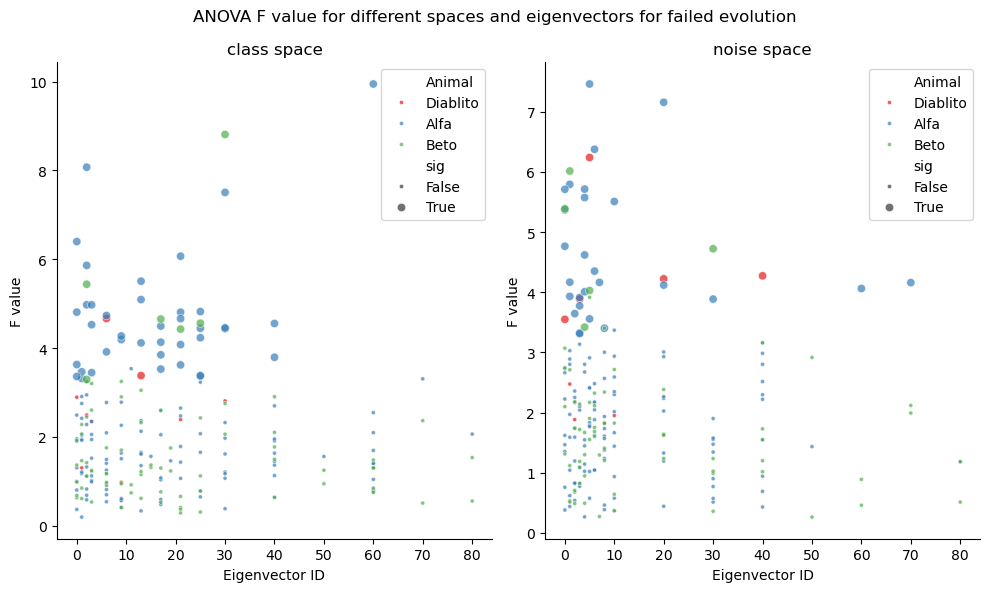

In [36]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_fail_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

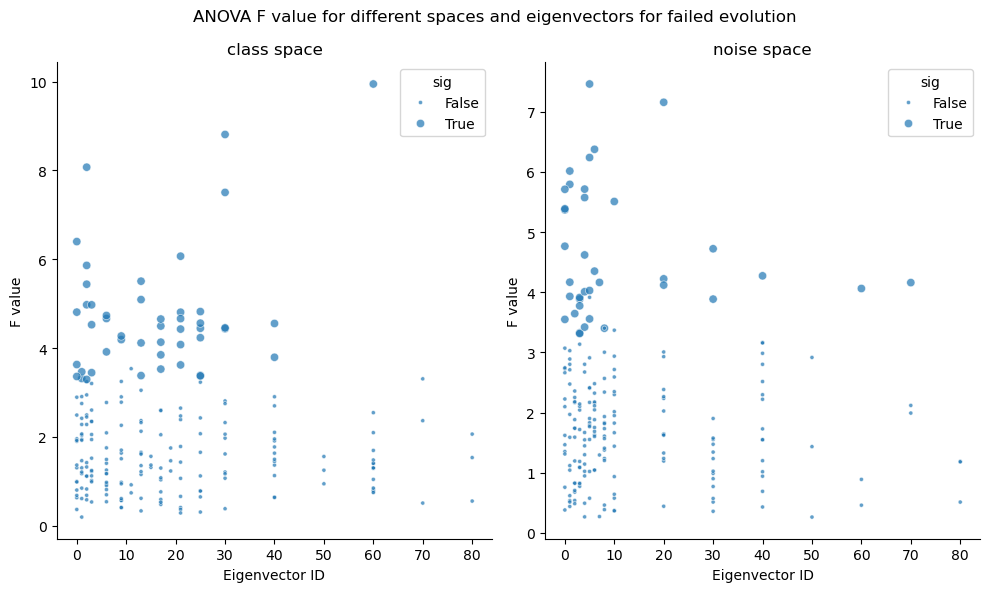

In [37]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_fail_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

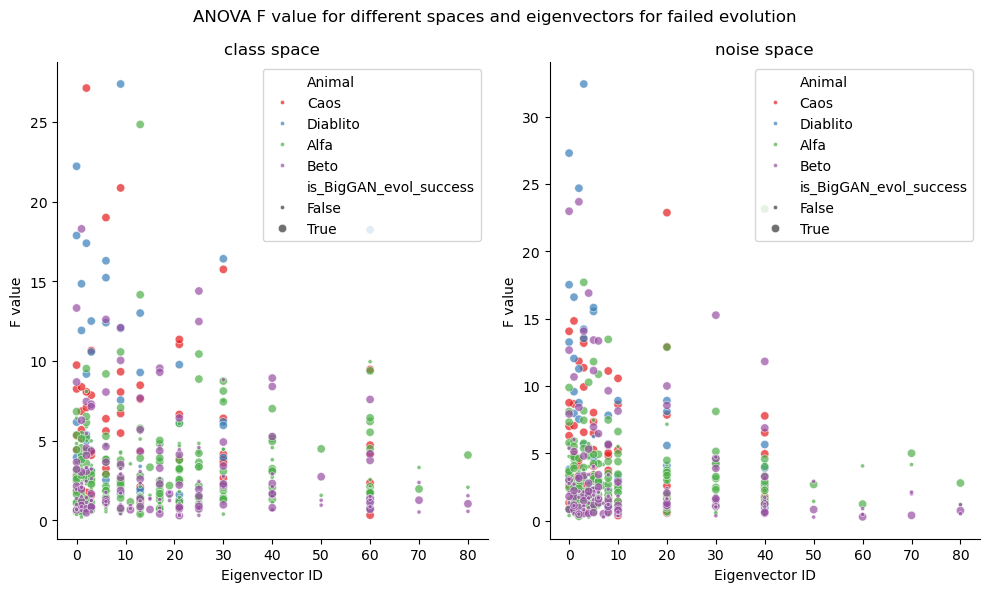

In [41]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                hue="Animal", palette="Set1", 
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                hue="Animal", palette="Set1",
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_space_eigen_Animal_sep", figh=fig)
plt.show()

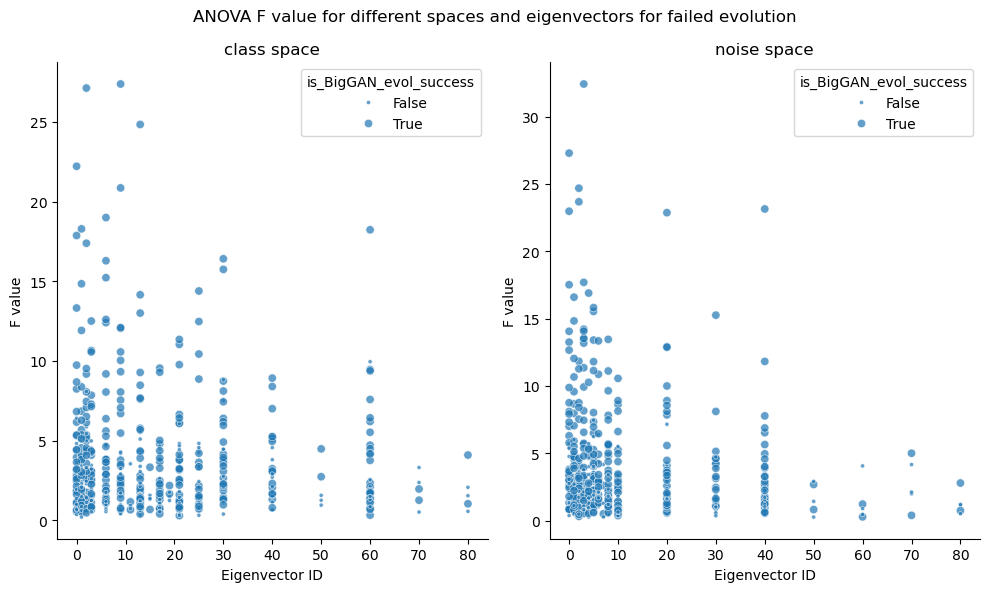

In [42]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('F value')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask]\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='is_BigGAN_evol_success',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('F value')

fig.suptitle('ANOVA F value for different spaces and eigenvectors for failed evolution')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_space_eigen_sep", figh=fig)
plt.show()

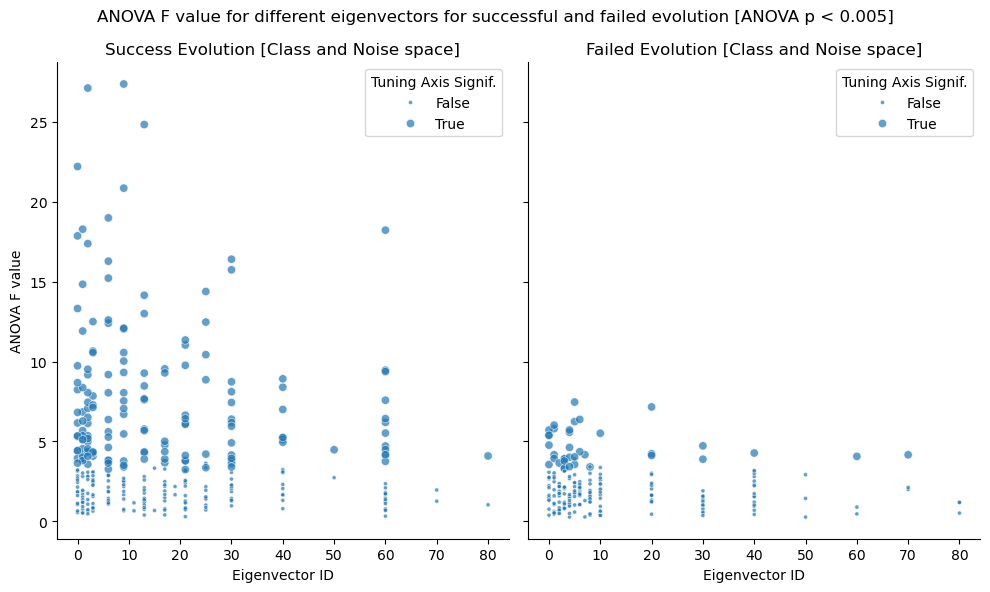

In [51]:
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharex=True, sharey=True)
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("is_BigGAN_evol_success")\
                    .query("space_name == 'class'"), x='eig_id', y='F_value', ax=ax[0], 
                # hue="Animal", palette="Set1", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('Success Evolution [Class and Noise space]')
ax[0].set_xlabel('Eigenvector ID')
ax[0].set_ylabel('ANOVA F value')
ax[0].legend(title='Tuning Axis Signif.')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("not is_BigGAN_evol_success")\
                    .query("space_name == 'noise'"), x='eig_id', y='F_value', ax=ax[1], 
                # hue="Animal", palette="Set1",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('Failed Evolution [Class and Noise space]' )
ax[1].set_xlabel('Eigenvector ID')
ax[1].set_ylabel('ANOVA F value')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('ANOVA F value for different eigenvectors for successful and failed evolution [ANOVA p < 0.005]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_eigen_sep", figh=fig)
plt.show()

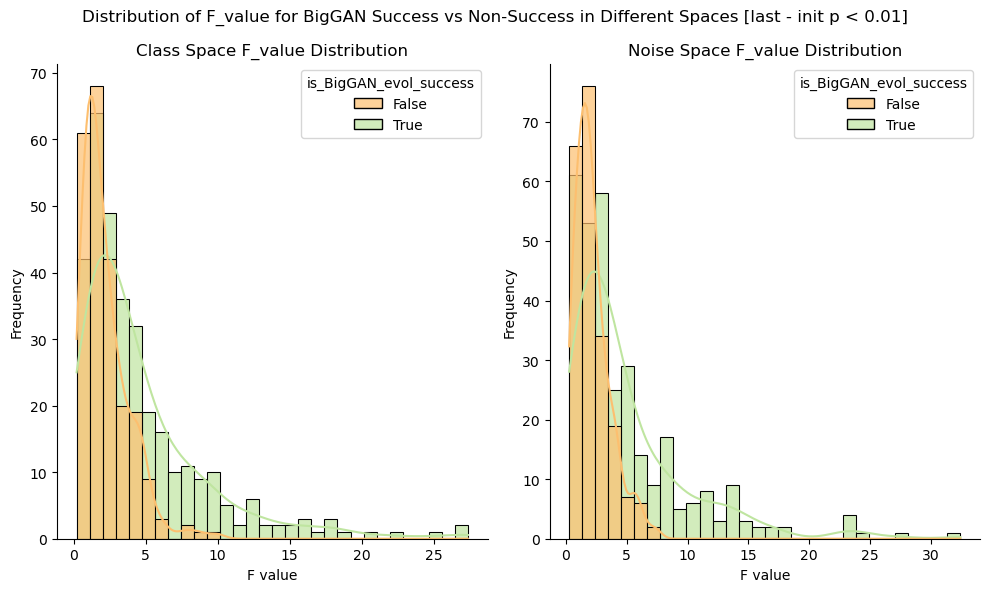

In [33]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
# Plot histogram for class space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[0], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[0].set_title('Class Space F_value Distribution')
ax[0].set_xlabel('F value')
ax[0].set_ylabel('Frequency')

# Plot histogram for noise space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'noise'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax[1], palette="Spectral", bins=30, kde=True, alpha=0.7)
ax[1].set_title('Noise Space F_value Distribution')
ax[1].set_xlabel('F value')
ax[1].set_ylabel('Frequency')

fig.suptitle(f'Distribution of F_value for BigGAN Success vs Non-Success in Different Spaces [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_hist_cmp_space_cmp", figh=fig)
plt.show()


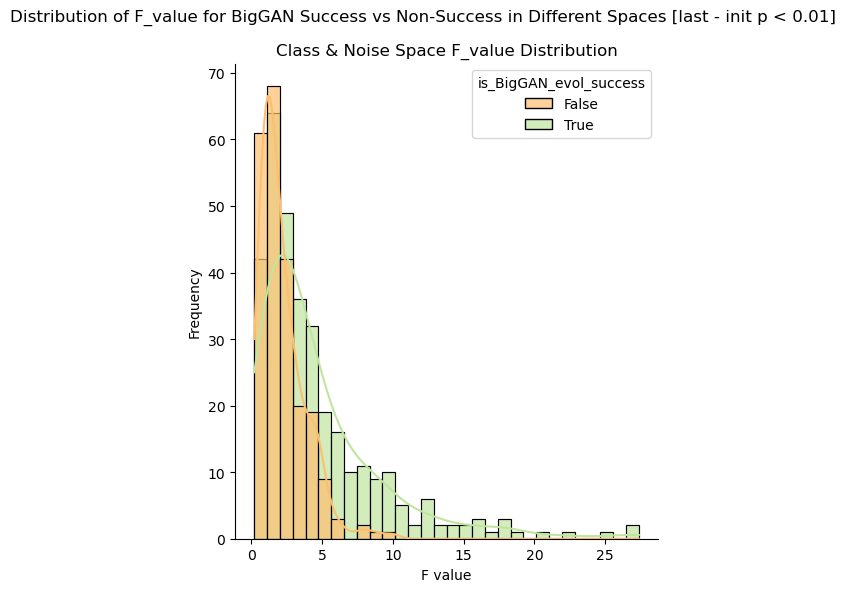

In [35]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)

fig, ax = plt.subplots(1, 1, figsize=(5, 6))
# Plot histogram for class space
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("space_name == 'class'"), 
             x='F_value', hue='is_BigGAN_evol_success', 
             ax=ax, palette="Spectral", bins=30, kde=True, alpha=0.7)
ax.set_title('Class & Noise Space F_value Distribution')
ax.set_xlabel('F value')
ax.set_ylabel('Frequency')

fig.suptitle(f'Distribution of F_value for BigGAN Success vs Non-Success in Different Spaces [{success_str}]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_ANOVA_F_value_hist_cmp", figh=fig)
plt.show()

### Peak location as function of Success vs Fail evolution | noise vs class space | significace of tuning axis 

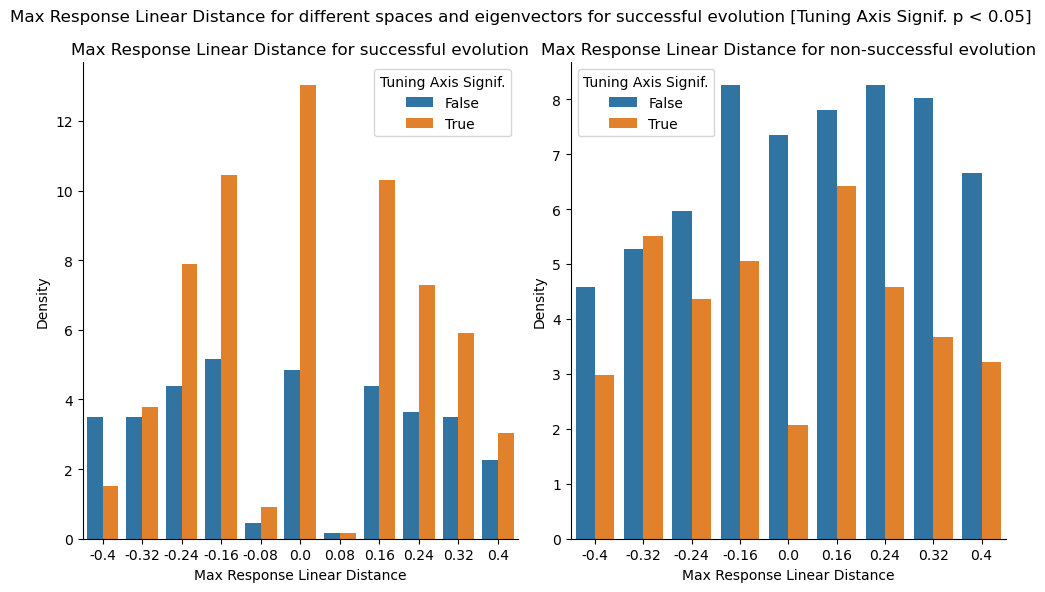

In [59]:
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.05
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')
ax[0].legend(title='Tuning Axis Signif.')

sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
              x='max_resp_lin_dist', hue='sig', stat='percent', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution [Tuning Axis Signif. p < 0.05]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_nomerge_p005", figh=fig)
plt.show() 

Merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )

In [59]:
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
# [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4] 
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)

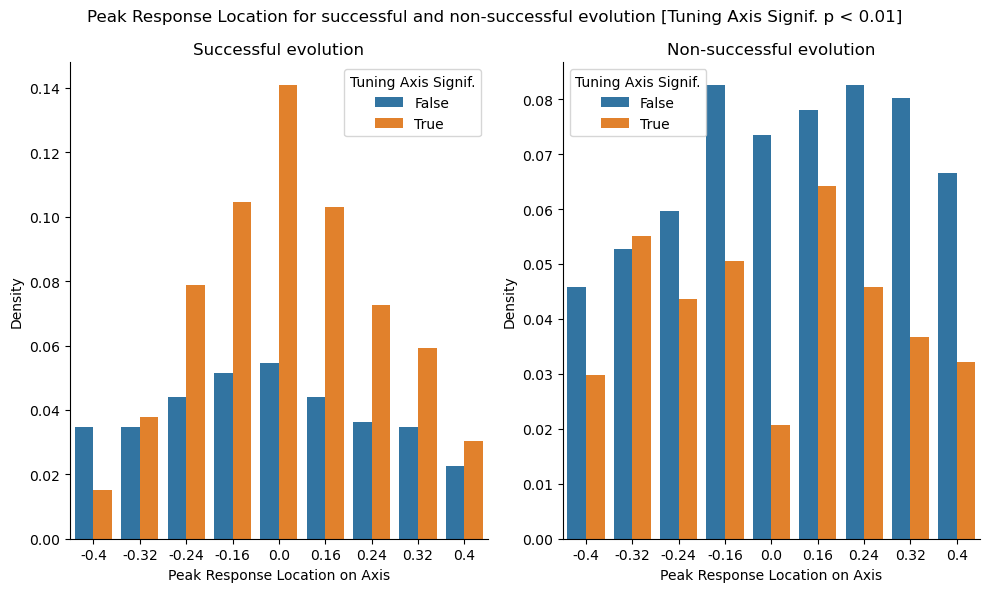

In [60]:
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.05
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
              x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Successful evolution')
ax[0].set_xlabel('Peak Response Location on Axis')
ax[0].set_ylabel('Density')
ax[0].legend(title='Tuning Axis Signif.')

sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
              x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Non-successful evolution')
ax[1].set_xlabel('Peak Response Location on Axis')
ax[1].set_ylabel('Density')
ax[1].legend(title='Tuning Axis Signif.')

fig.suptitle('Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < 0.01]')
plt.tight_layout()
saveallforms(synfigdir, "BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_merge_p005", figh=fig)
plt.show() 

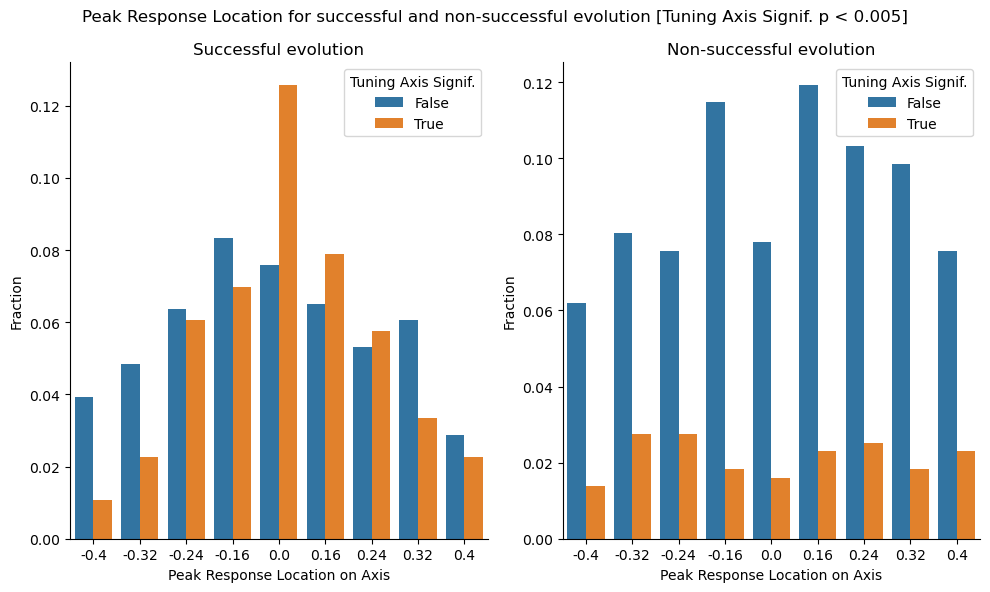

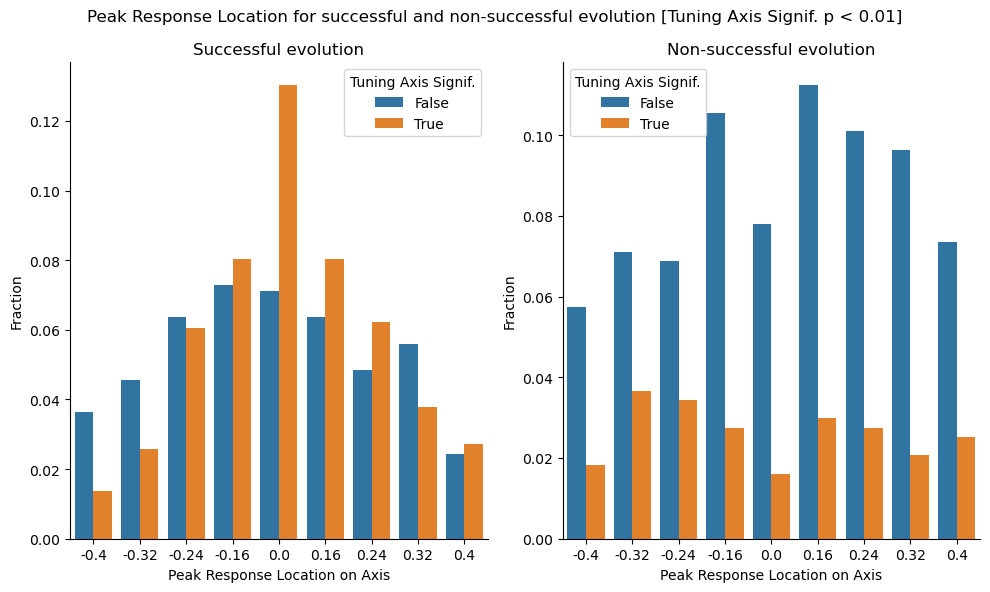

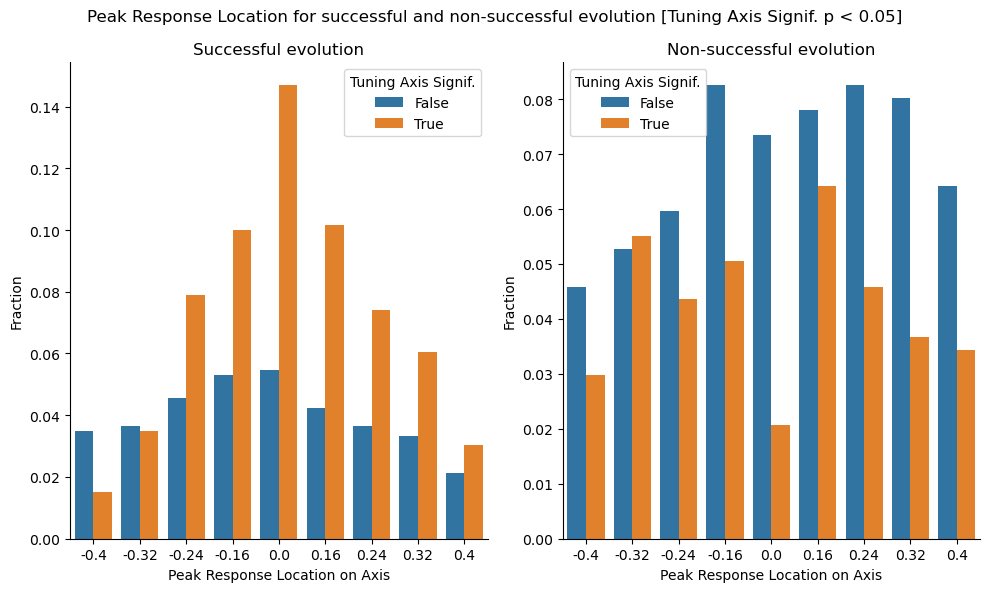

In [64]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

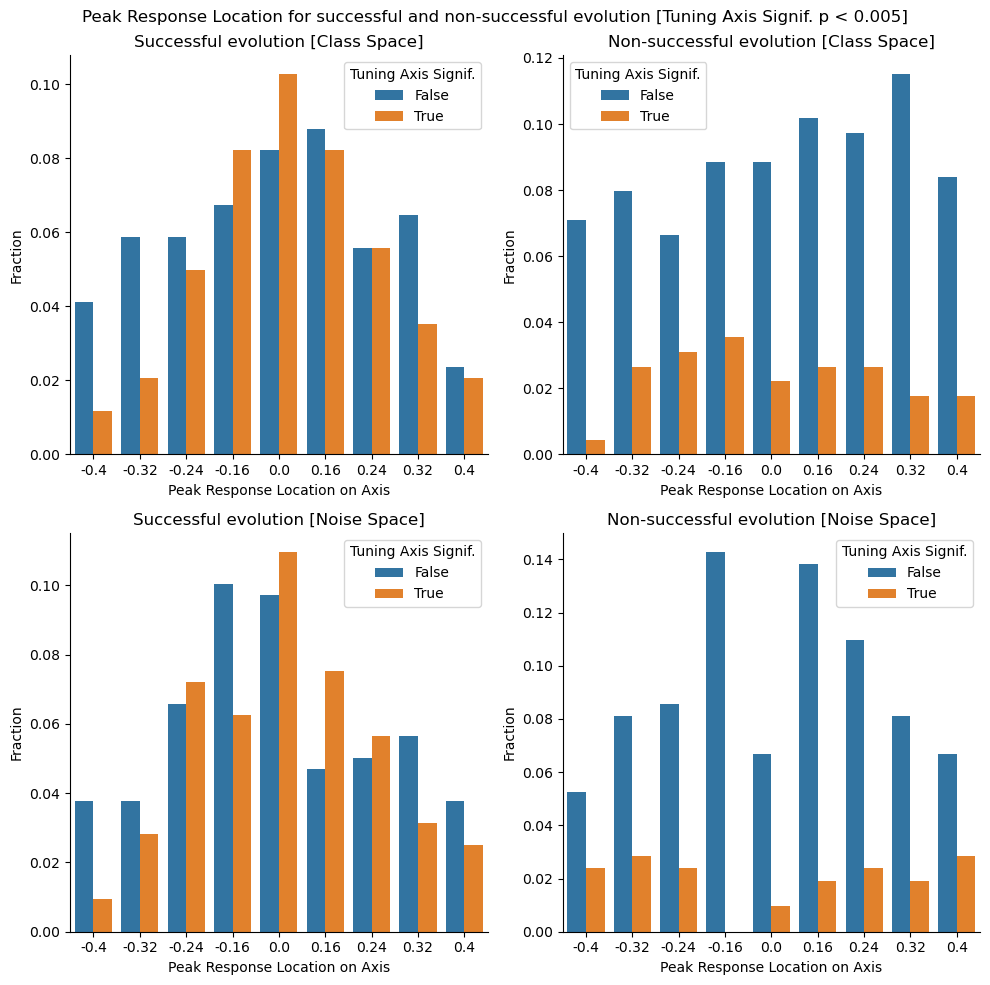

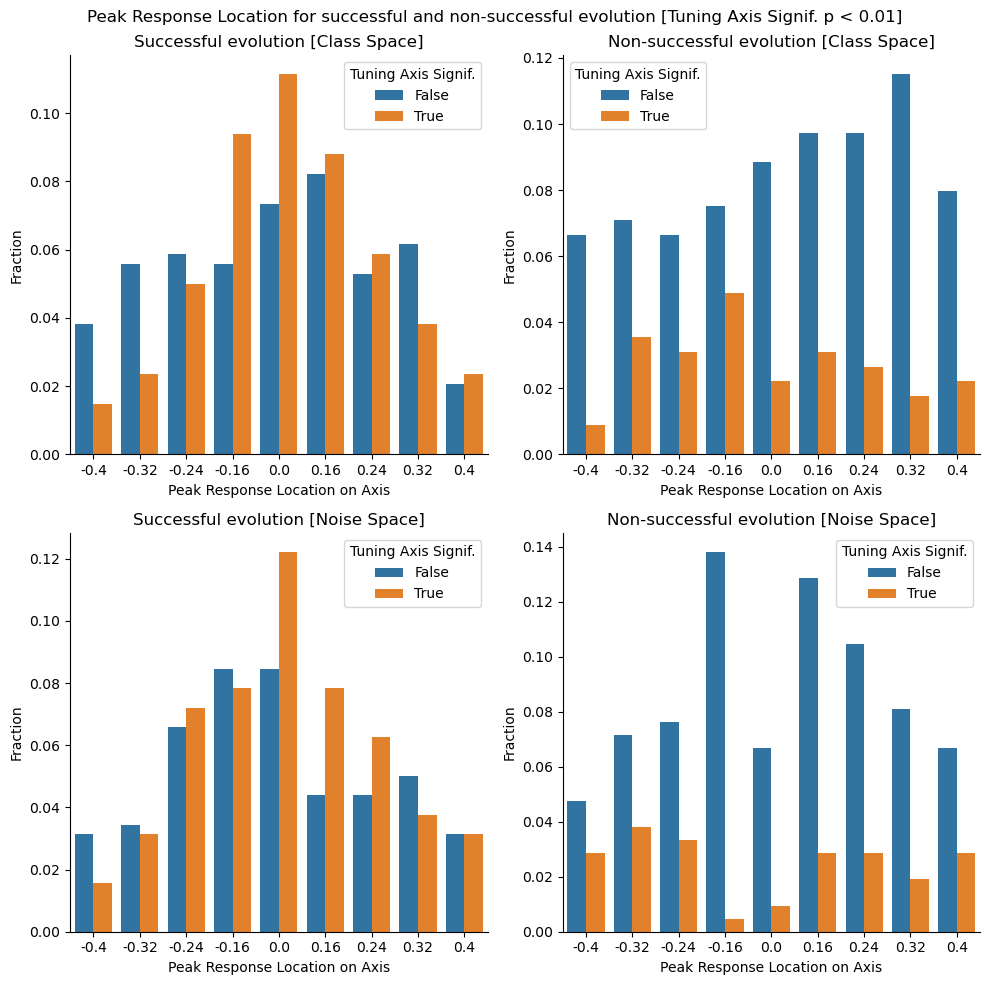

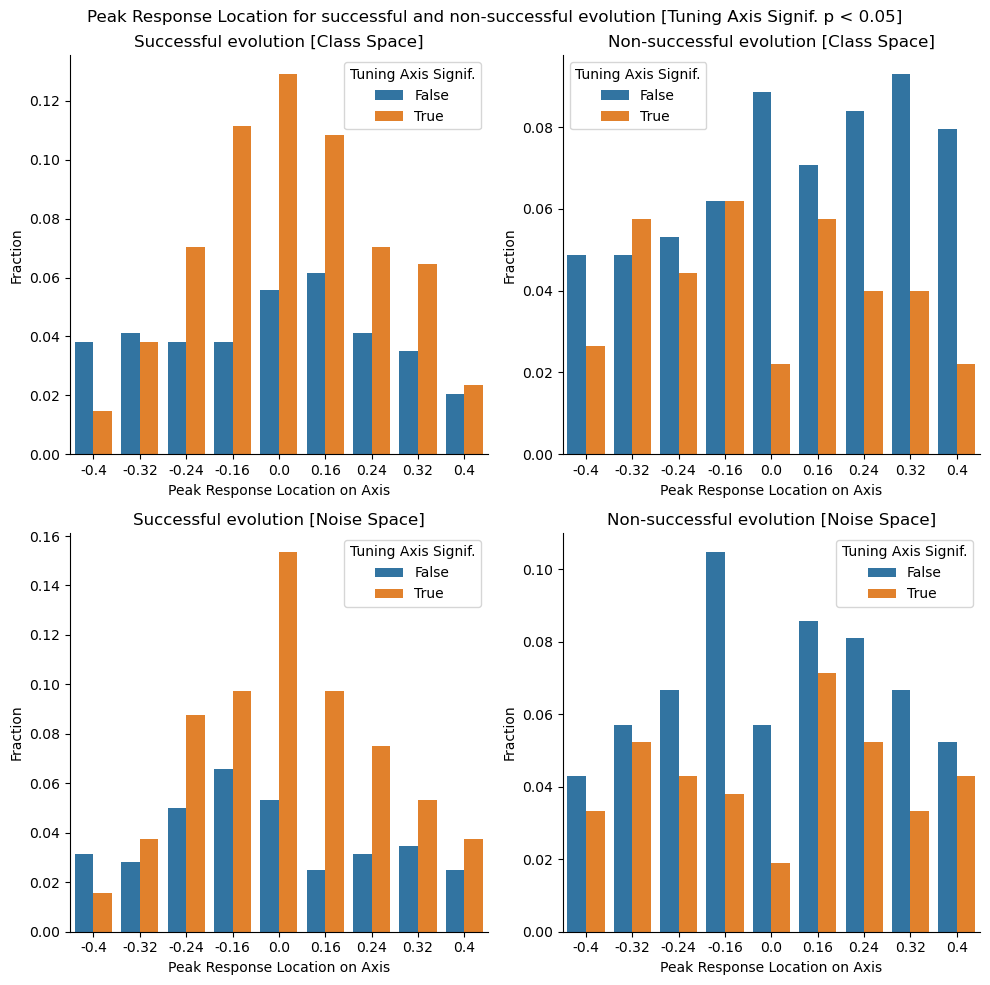

In [51]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and space_name == 'class'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 0].set_title('Successful evolution [Class Space]')
    ax[0, 0].set_xlabel('Peak Response Location on Axis')
    ax[0, 0].set_ylabel('Fraction')
    ax[0, 0].legend(title='Tuning Axis Signif.')
    
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 0].set_title('Successful evolution [Noise Space]')
    ax[1, 0].set_xlabel('Peak Response Location on Axis')
    ax[1, 0].set_ylabel('Fraction')
    ax[1, 0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and space_name == 'class'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[0, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 1].set_title('Non-successful evolution [Class Space]')
    ax[0, 1].set_xlabel('Peak Response Location on Axis')
    ax[0, 1].set_ylabel('Fraction')
    ax[0, 1].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='proportion', ax=ax[1, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 1].set_title('Non-successful evolution [Noise Space]')
    ax[1, 1].set_xlabel('Peak Response Location on Axis')
    ax[1, 1].set_ylabel('Fraction')
    ax[1, 1].legend(title='Tuning Axis Signif.')
    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_class_vs_noise_countplot_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

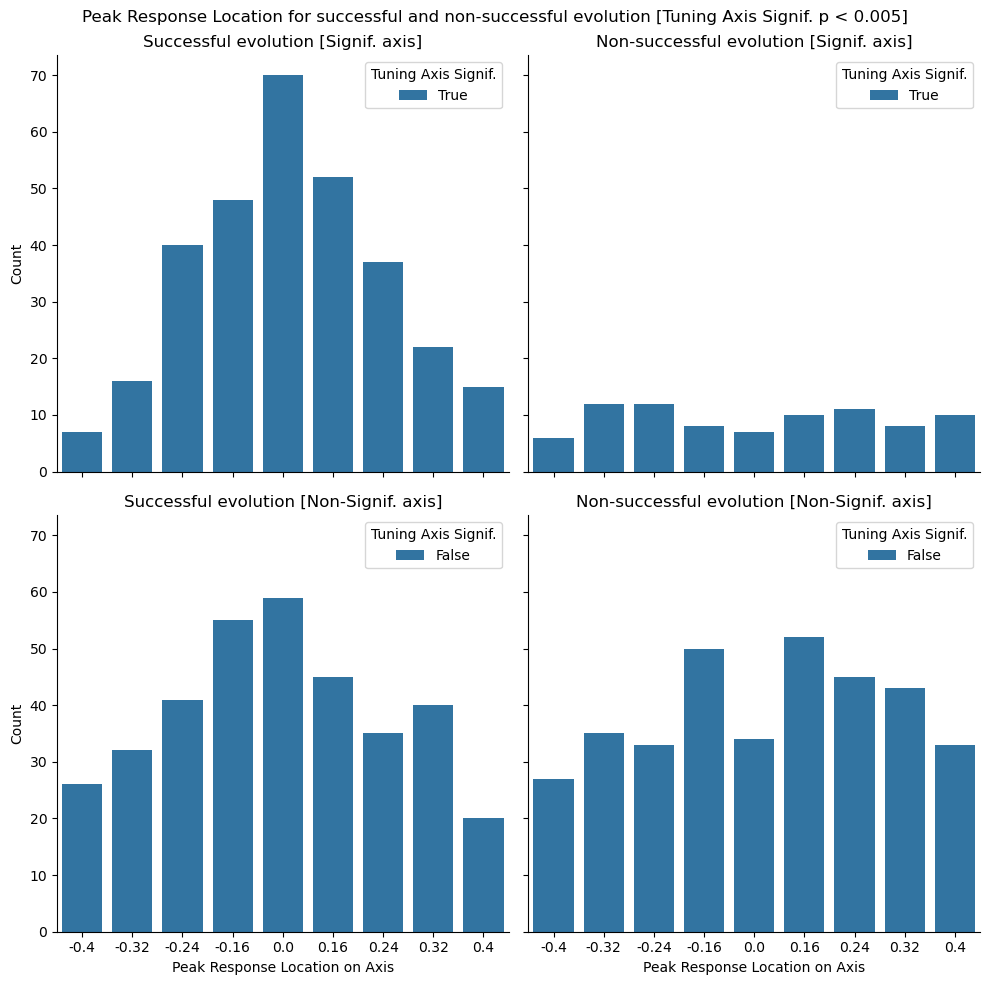

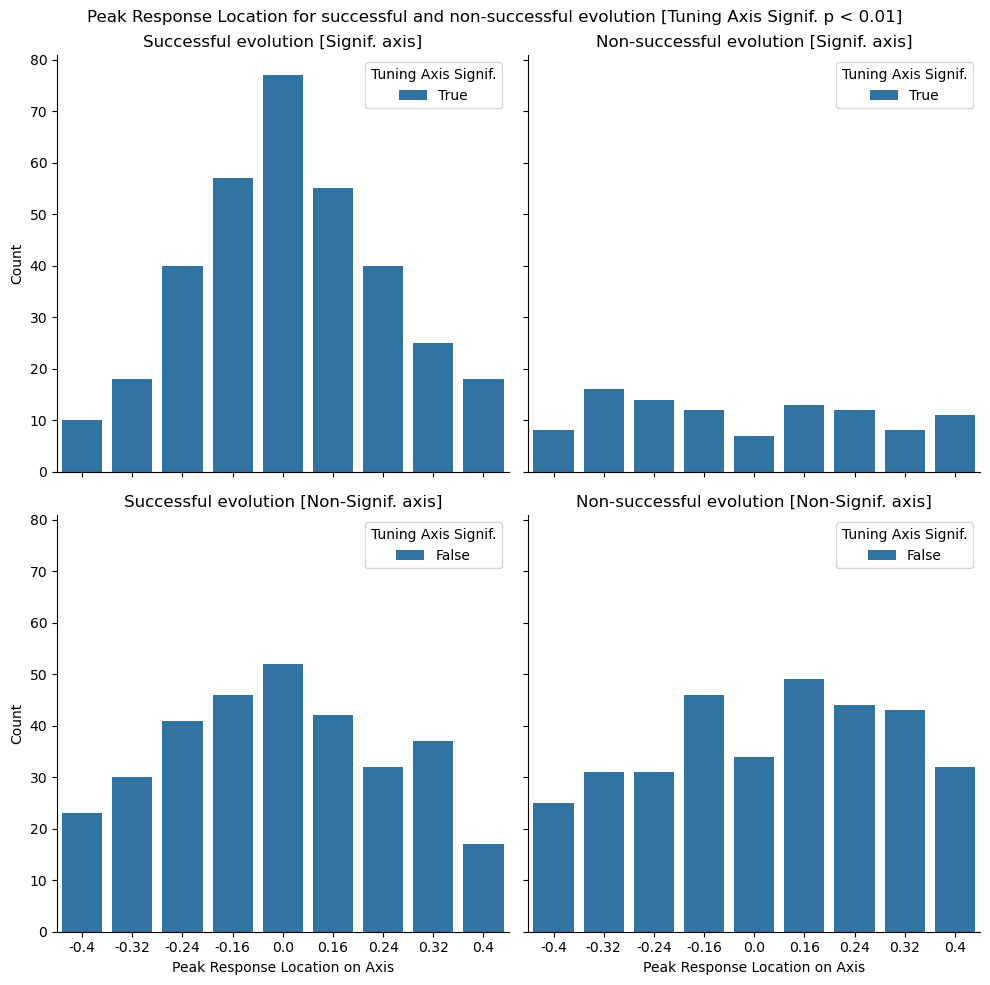

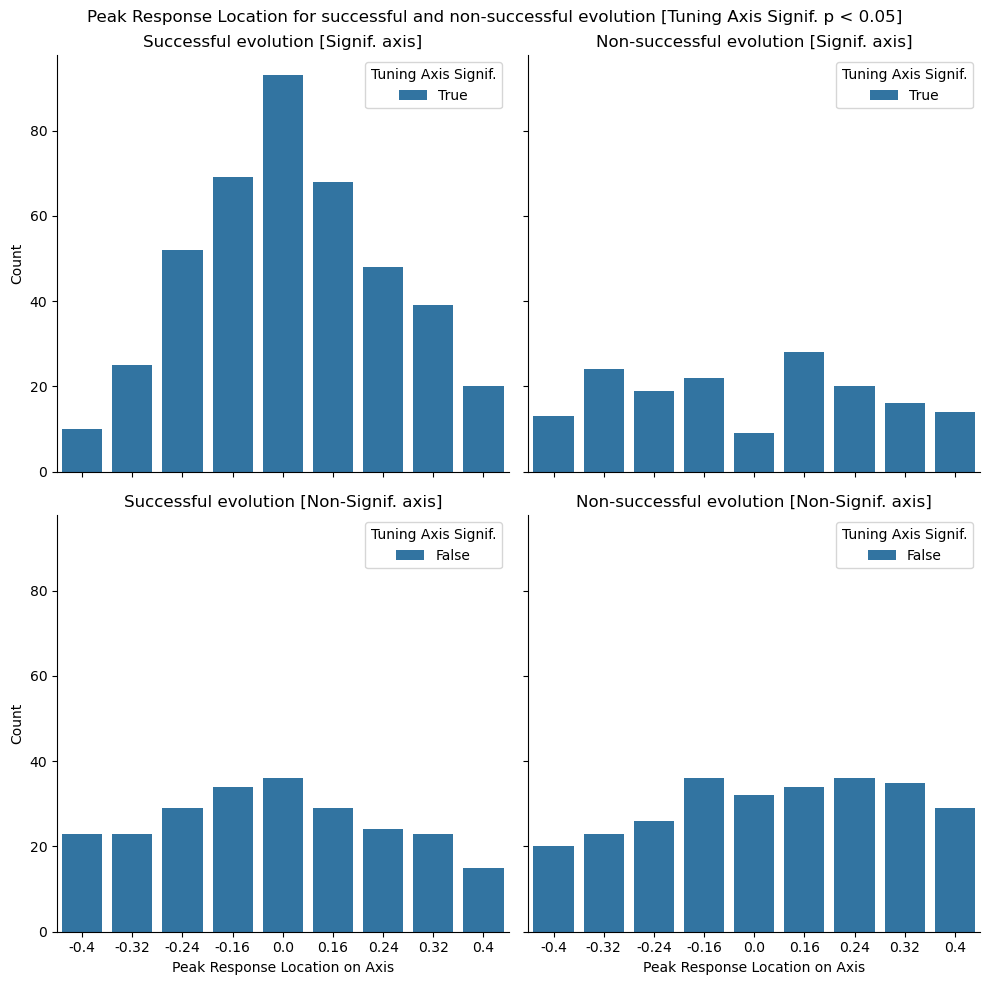

In [53]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and sig"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 0].set_title('Successful evolution [Signif. axis]')
    ax[0, 0].set_xlabel('Peak Response Location on Axis')
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].legend(title='Tuning Axis Signif.')
    
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and not sig"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 0].set_title('Successful evolution [Non-Signif. axis]')
    ax[1, 0].set_xlabel('Peak Response Location on Axis')
    ax[1, 0].set_ylabel('Count')
    ax[1, 0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and sig"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 1].set_title('Non-successful evolution [Signif. axis]')
    ax[0, 1].set_xlabel('Peak Response Location on Axis')
    ax[0, 1].set_ylabel('Count')
    ax[0, 1].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and not sig"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 1].set_title('Non-successful evolution [Non-Signif. axis]')
    ax[1, 1].set_xlabel('Peak Response Location on Axis')
    ax[1, 1].set_ylabel('Count')
    ax[1, 1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_2x2_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


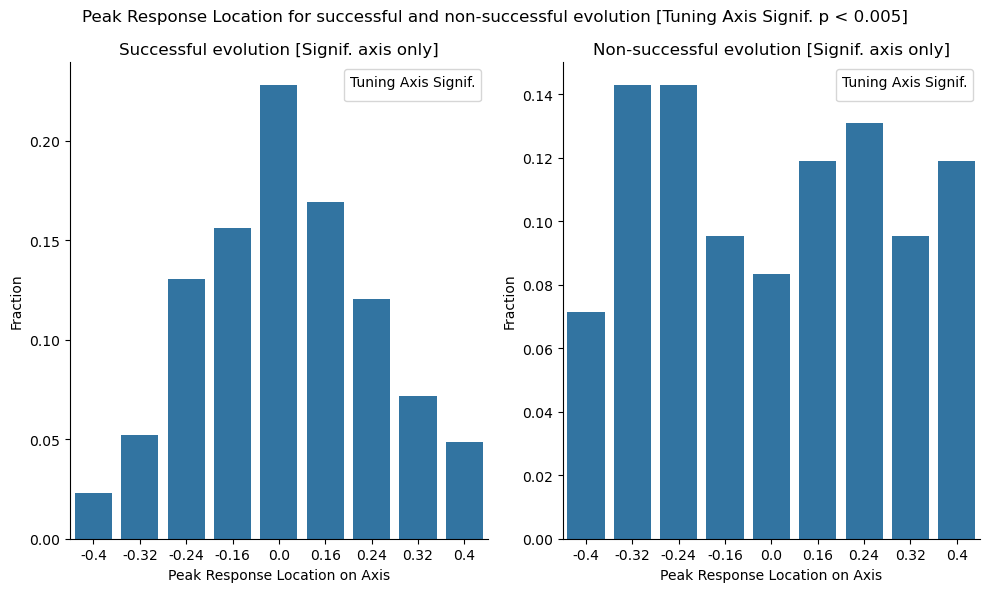

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


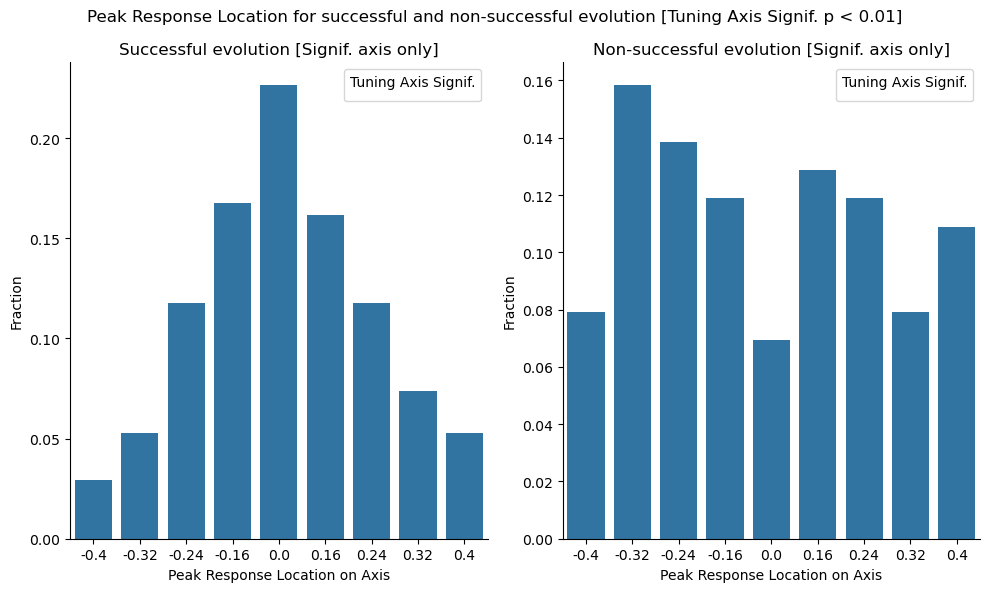

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


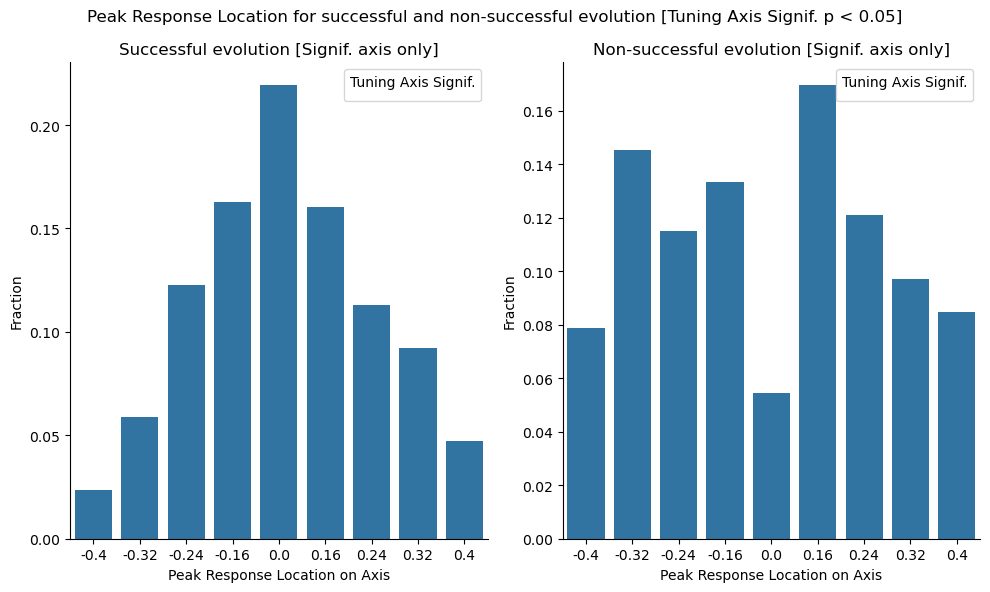

In [63]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution [Signif. axis only]')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution [Signif. axis only]')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_signif_only_merge_p{pval_threshold}", figh=fig)
    plt.show() 

### Peak location as function of BigGAN hessian vs BigGAN

In [49]:
print(evol_stats_synopsis_df.groupby("GANspace1").size())
print(evol_stats_synopsis_df.groupby("GANspace2").size())
print(evol_stats_synopsis_df.groupby("optimizer1").size())
print(evol_stats_synopsis_df.groupby("optimizer2").size())

GANspace1
fc6    52
dtype: int64
GANspace2
BigGAN          18
BigGAN_class    34
dtype: int64
optimizer1
CMAES            45
CMAES_Hessian     7
dtype: int64
optimizer2
CMAES    52
dtype: int64


In [56]:
evol_stats_synopsis_df.columns


Index(['ChanQual', 'Exp_collection', 'Expi', 'WebCam', 'comments', 'ephysFN',
       'expControlFN', 'pref_chan', 'pref_unit', 'stim_size', 'stimuli',
       'Animal', 'prefchan', 'prefunit', 'imgpos', 'imgsize', 'GANspace1',
       'GANspace2', 'space1_cfg', 'space2_cfg', 'optimizer1', 'optimizer2',
       'optim1_cfg', 'optim2_cfg', 'init_resp_thr0', 'last_resp_thr0',
       'max_resp_thr0', 'max_evol_resp_thr0', 'max_resp_thr0_blocknum',
       'lastinit_thr0_tval', 'lastinit_thr0_pval', 'lastinit_thr0_dof',
       'maxinit_thr0_tval', 'maxinit_thr0_pval', 'maxinit_thr0_dof',
       'init_resp_thr1', 'last_resp_thr1', 'max_resp_thr1',
       'max_evol_resp_thr1', 'max_resp_thr1_blocknum', 'lastinit_thr1_tval',
       'lastinit_thr1_pval', 'lastinit_thr1_dof', 'maxinit_thr1_tval',
       'maxinit_thr1_pval', 'maxinit_thr1_dof', 'bslresp_mean', 'bslresp_std',
       'mean_ref_resp', 'max_ref_resp', 'max_ref_resp_imgname',
       'max_evol_resp', 'max_evol_resp_blockidx', 'max_evolref_

In [57]:
BigGAN_success_explist = evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01")['Exp_id']
BigGAN_class_optim_expids = evol_stats_synopsis_df.query("GANspace2 == 'BigGAN_class'")['Exp_id']

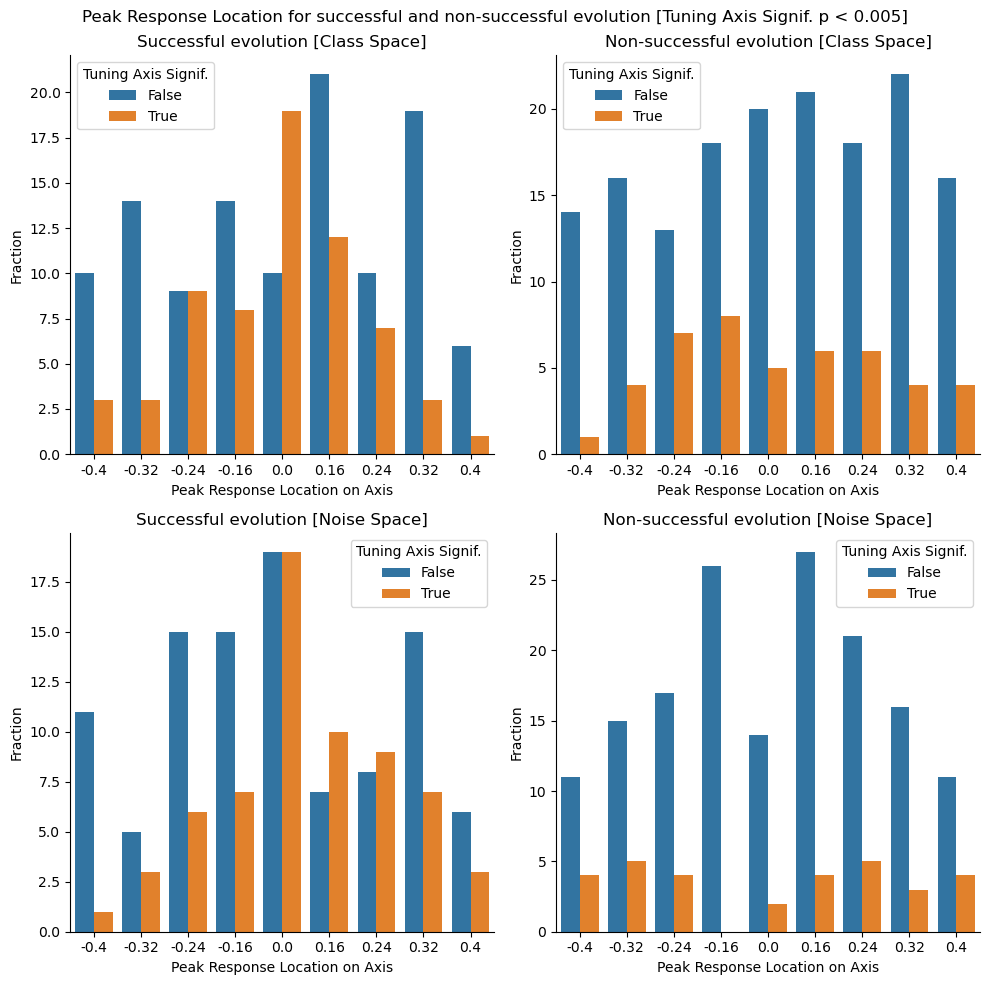

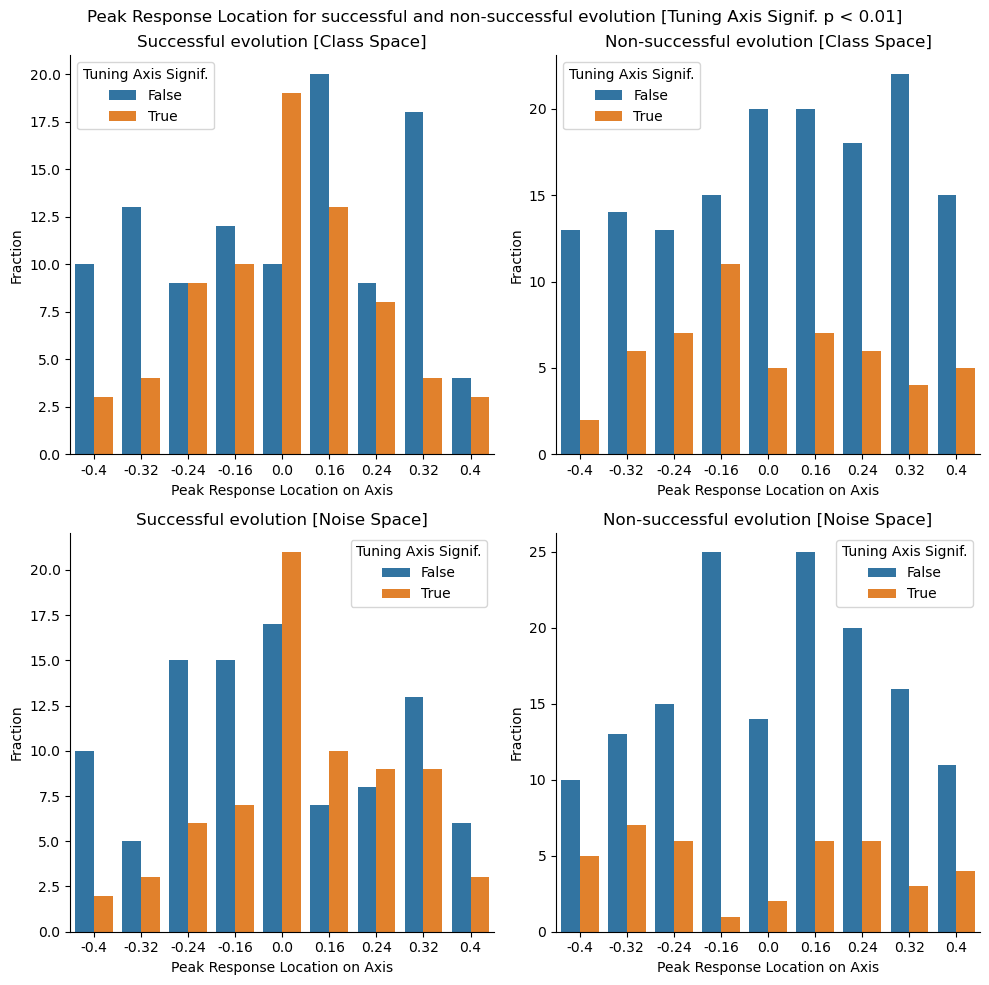

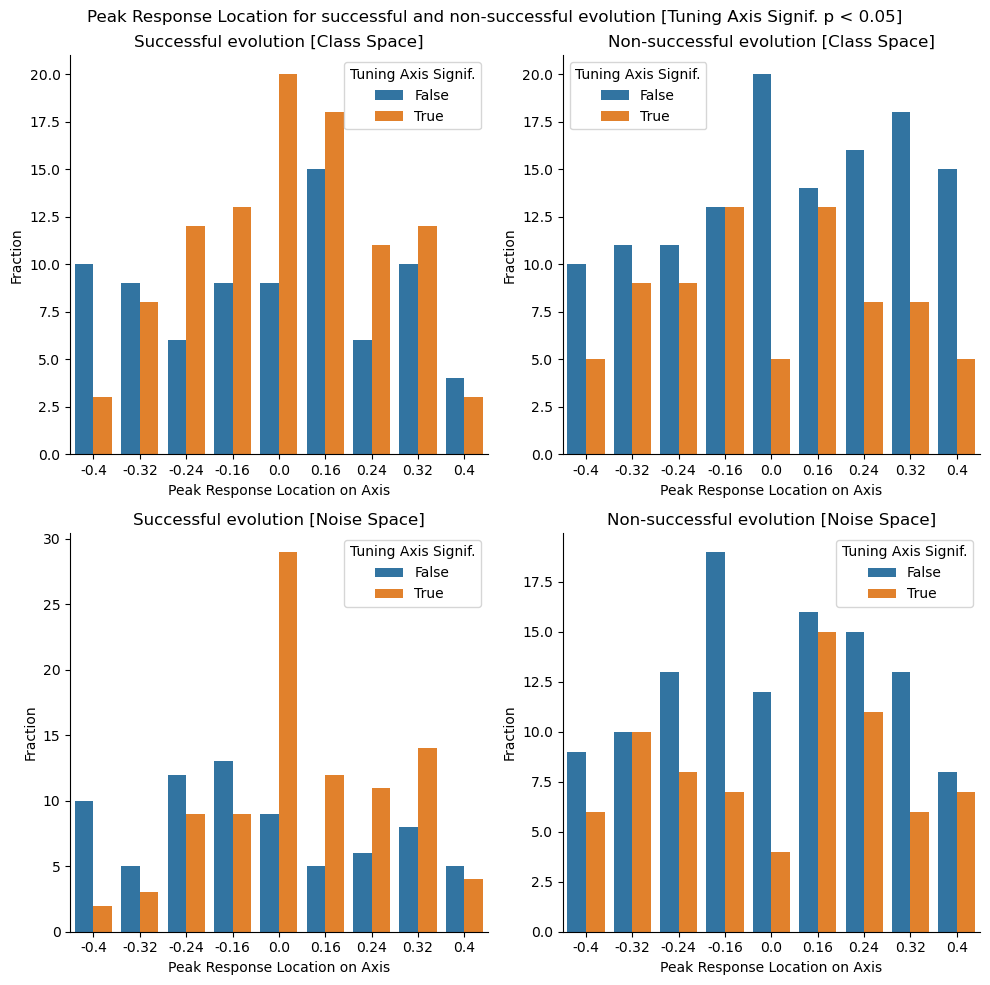

In [62]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and Exp_id in @BigGAN_class_optim_expids and space_name == 'class' "), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 0].set_title('Successful evolution [Class Space]')
    ax[0, 0].set_xlabel('Peak Response Location on Axis')
    ax[0, 0].set_ylabel('Fraction')
    ax[0, 0].legend(title='Tuning Axis Signif.')
    
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and Exp_id in @BigGAN_class_optim_expids and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 0].set_title('Successful evolution [Noise Space]')
    ax[1, 0].set_xlabel('Peak Response Location on Axis')
    ax[1, 0].set_ylabel('Fraction')
    ax[1, 0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and Exp_id in @BigGAN_class_optim_expids  and space_name == 'class'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 1].set_title('Non-successful evolution [Class Space]')
    ax[0, 1].set_xlabel('Peak Response Location on Axis')
    ax[0, 1].set_ylabel('Fraction')
    ax[0, 1].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and Exp_id in @BigGAN_class_optim_expids  and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 1].set_title('Non-successful evolution [Noise Space]')
    ax[1, 1].set_xlabel('Peak Response Location on Axis')
    ax[1, 1].set_ylabel('Fraction')
    ax[1, 1].legend(title='Tuning Axis Signif.')
    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_BigGAN_class_optim_class_vs_noise_countplot_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

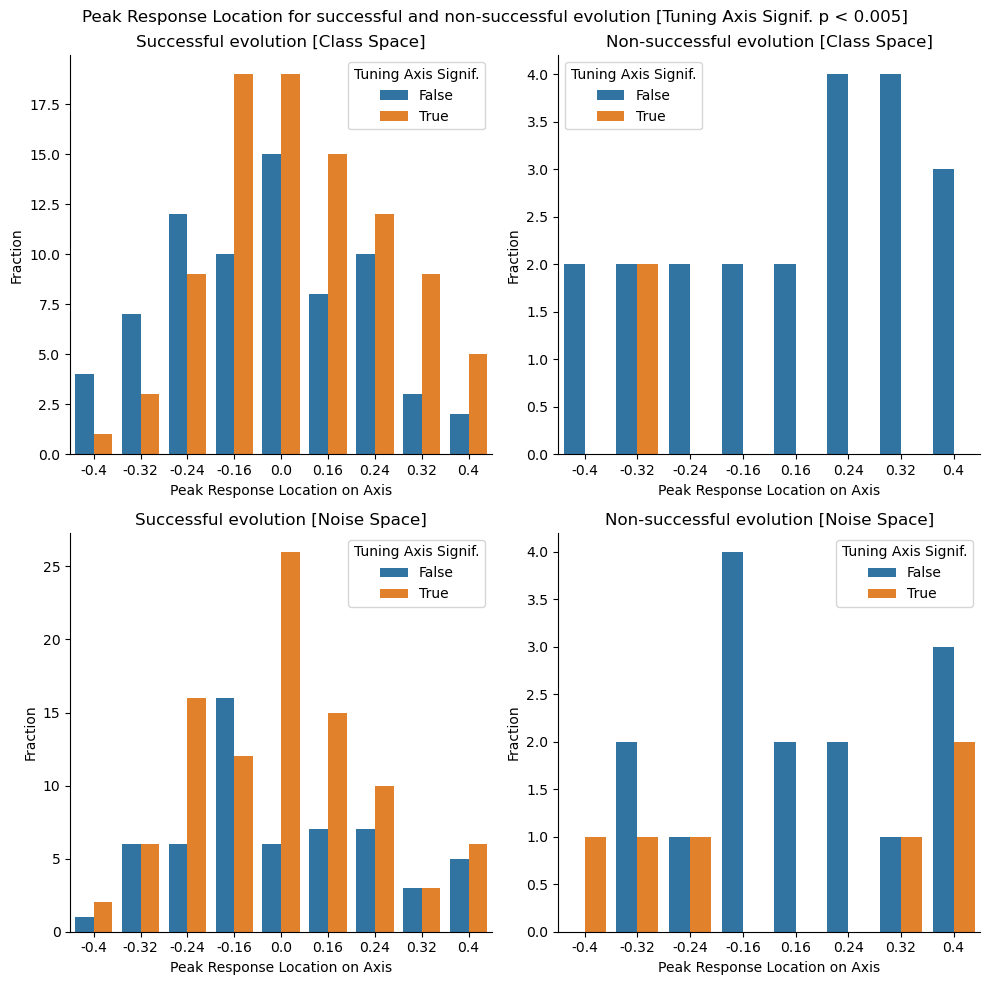

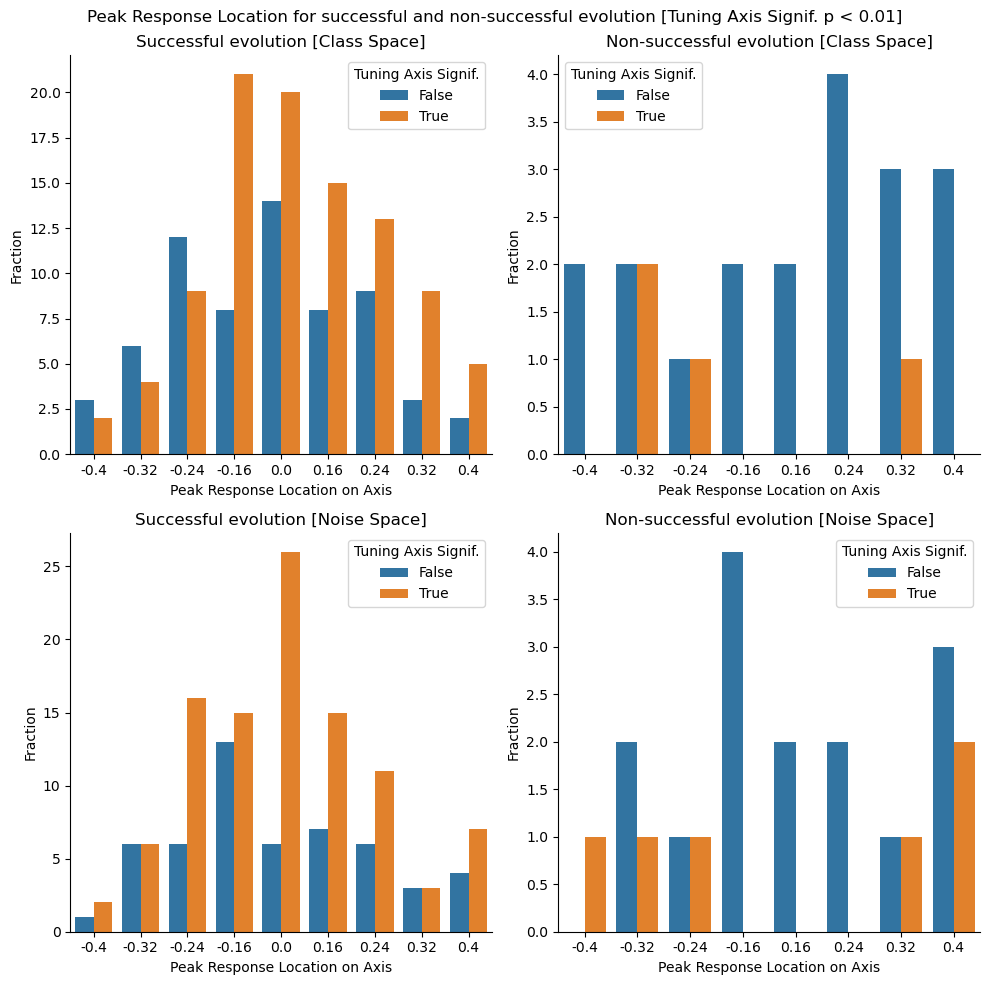

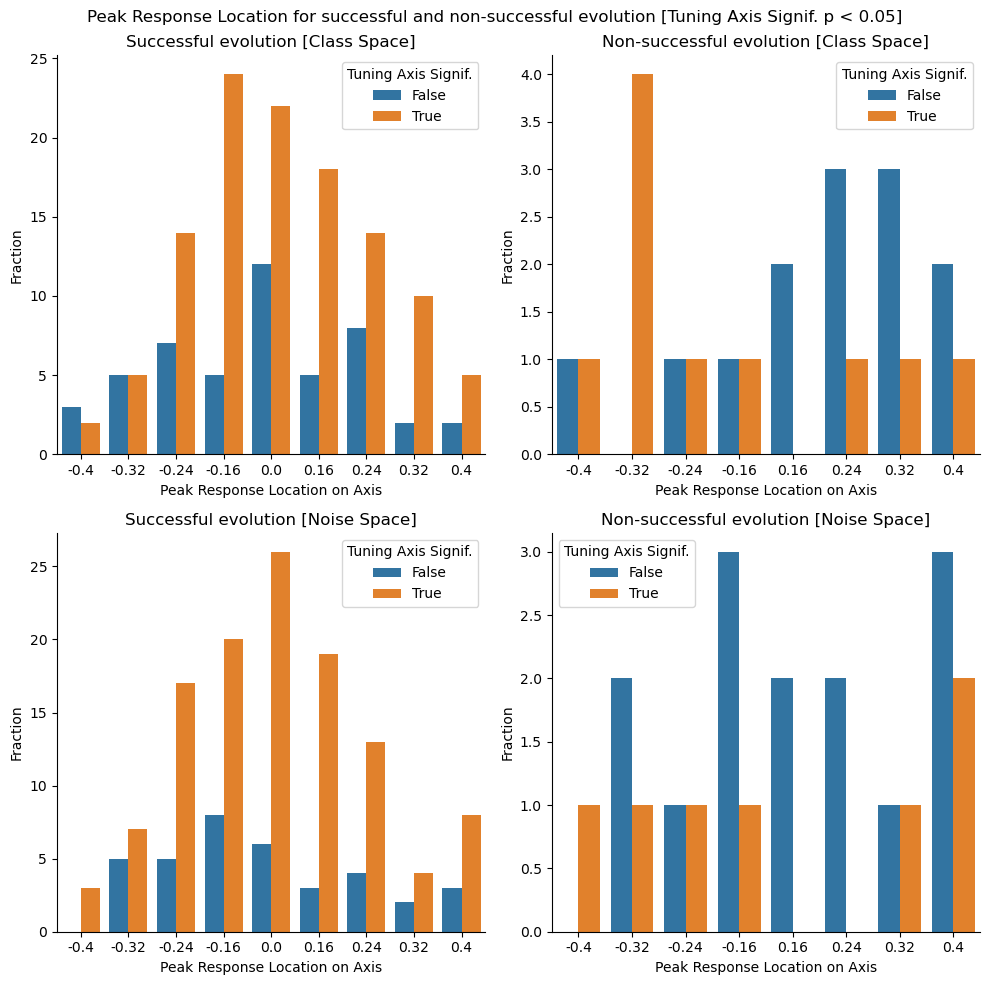

In [63]:
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and Exp_id not in @BigGAN_class_optim_expids and space_name == 'class' "), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 0].set_title('Successful evolution [Class Space]')
    ax[0, 0].set_xlabel('Peak Response Location on Axis')
    ax[0, 0].set_ylabel('Fraction')
    ax[0, 0].legend(title='Tuning Axis Signif.')
    
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist and Exp_id not in @BigGAN_class_optim_expids and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 0].set_title('Successful evolution [Noise Space]')
    ax[1, 0].set_xlabel('Peak Response Location on Axis')
    ax[1, 0].set_ylabel('Fraction')
    ax[1, 0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and Exp_id not in @BigGAN_class_optim_expids  and space_name == 'class'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[0, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0, 1].set_title('Non-successful evolution [Class Space]')
    ax[0, 1].set_xlabel('Peak Response Location on Axis')
    ax[0, 1].set_ylabel('Fraction')
    ax[0, 1].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist and Exp_id not in @BigGAN_class_optim_expids  and space_name == 'noise'"), 
                x='max_resp_lin_dist_bin', hue='sig', stat='count', ax=ax[1, 1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1, 1].set_title('Non-successful evolution [Noise Space]')
    ax[1, 1].set_xlabel('Peak Response Location on Axis')
    ax[1, 1].set_ylabel('Fraction')
    ax[1, 1].legend(title='Tuning Axis Signif.')
    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_BigGAN_optim_class_vs_noise_countplot_cmp_merge_p{pval_threshold}", figh=fig)
    plt.show() 

### Tuning axes shape plot

In [85]:
row

space_name                                                           noise
eig_id                                                                  40
F_value                                                           4.577801
p_value                                                           0.000301
stats_str                                     F-val: 4.58 | p-val: 3.0e-04
lin_dist_set             [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0...
lin_dist_num                                                             9
avg_resp_per_lin_dist    [5.706323146820068, 1.9028111696243286, 8.5626...
max_resp_lin_dist                                                     0.24
max_resp_val                                                     23.309439
Animal                                                                Alfa
Expi                                                                  18.0
ephysFN                                                  Alfa-12012021-003
stimuli                  

In [84]:
row.avg_resp_per_lin_dist 

[5.706323146820068,
 1.9028111696243286,
 8.562650680541992,
 11.654719352722168,
 21.08949089050293,
 18.995895385742188,
 23.309438705444336,
 6.659839630126953,
 7.7276177406311035]

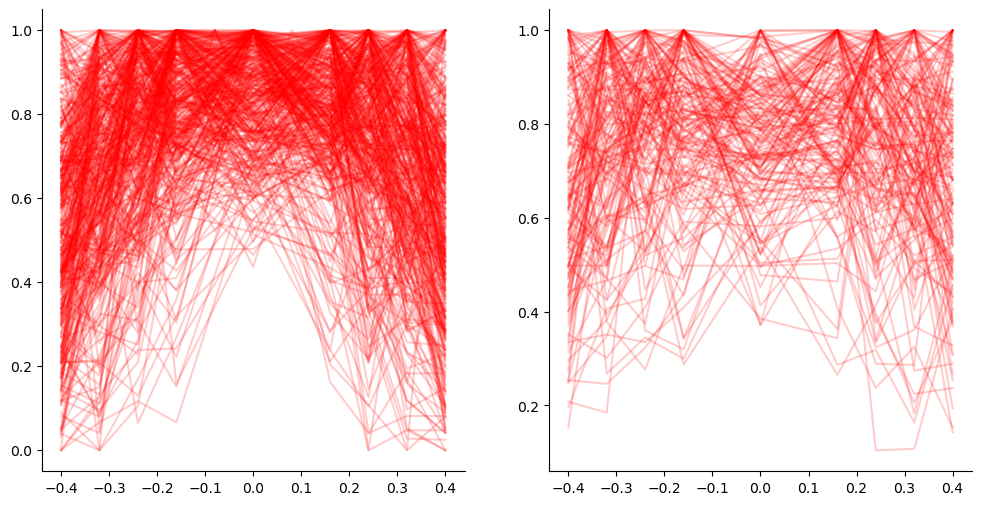

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  and  sig").iterrows():
    axs[0].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='red', alpha=0.2)

for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  and  sig").iterrows():
    axs[1].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='red', alpha=0.2)
plt.show()

### Analysis separating by the height of the end response

In [63]:
evol_stats_synopsis_df.columns

Index(['ChanQual', 'Exp_collection', 'Expi', 'WebCam', 'comments', 'ephysFN',
       'expControlFN', 'pref_chan', 'pref_unit', 'stim_size', 'stimuli',
       'Animal', 'prefchan', 'prefunit', 'imgpos', 'imgsize', 'GANspace1',
       'GANspace2', 'space1_cfg', 'space2_cfg', 'optimizer1', 'optimizer2',
       'optim1_cfg', 'optim2_cfg', 'init_resp_thr0', 'last_resp_thr0',
       'max_resp_thr0', 'max_evol_resp_thr0', 'max_resp_thr0_blocknum',
       'lastinit_thr0_tval', 'lastinit_thr0_pval', 'lastinit_thr0_dof',
       'maxinit_thr0_tval', 'maxinit_thr0_pval', 'maxinit_thr0_dof',
       'init_resp_thr1', 'last_resp_thr1', 'max_resp_thr1',
       'max_evol_resp_thr1', 'max_resp_thr1_blocknum', 'lastinit_thr1_tval',
       'lastinit_thr1_pval', 'lastinit_thr1_dof', 'maxinit_thr1_tval',
       'maxinit_thr1_pval', 'maxinit_thr1_dof', 'bslresp_mean', 'bslresp_std',
       'mean_ref_resp', 'max_ref_resp', 'max_ref_resp_imgname',
       'max_evol_resp', 'max_evol_resp_blockidx', 'max_evolref_

In [67]:
evol_stats_synopsis_df['last_evoke_resp_thr0_maxnorm'] = (evol_stats_synopsis_df['last_resp_thr0'] - evol_stats_synopsis_df['bslresp_mean']) / \
                                                         (evol_stats_synopsis_df['max_evolref_resp'] - evol_stats_synopsis_df['bslresp_mean'])
evol_stats_synopsis_df['last_evoke_resp_thr1_maxnorm'] = (evol_stats_synopsis_df['last_resp_thr1'] - evol_stats_synopsis_df['bslresp_mean']) / \
                                                         (evol_stats_synopsis_df['max_evolref_resp'] - evol_stats_synopsis_df['bslresp_mean'])
evol_stats_synopsis_df['max_evoke_resp_thr0_maxnorm'] =  (evol_stats_synopsis_df['max_resp_thr0'] - evol_stats_synopsis_df['bslresp_mean']) / \
                                                         (evol_stats_synopsis_df['max_evolref_resp'] - evol_stats_synopsis_df['bslresp_mean'])
evol_stats_synopsis_df['max_evoke_resp_thr1_maxnorm'] =  (evol_stats_synopsis_df['max_resp_thr1'] - evol_stats_synopsis_df['bslresp_mean']) / \
                                                         (evol_stats_synopsis_df['max_evolref_resp'] - evol_stats_synopsis_df['bslresp_mean'])

<Axes: xlabel='lastinit_thr0_tval', ylabel='last_evoke_resp_thr0_maxnorm'>

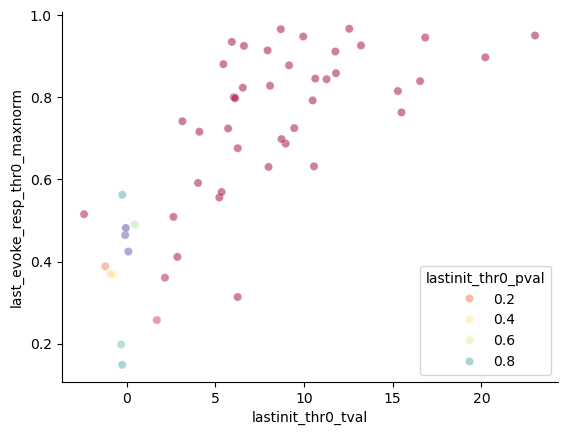

In [66]:
sns.scatterplot(data=evol_stats_synopsis_df, x='lastinit_thr0_tval', y='last_evoke_resp_thr0_maxnorm', hue='lastinit_thr0_pval', alpha=0.5, palette='Spectral')


<Axes: xlabel='maxinit_thr1_tval', ylabel='max_evoke_resp_thr1_maxnorm'>

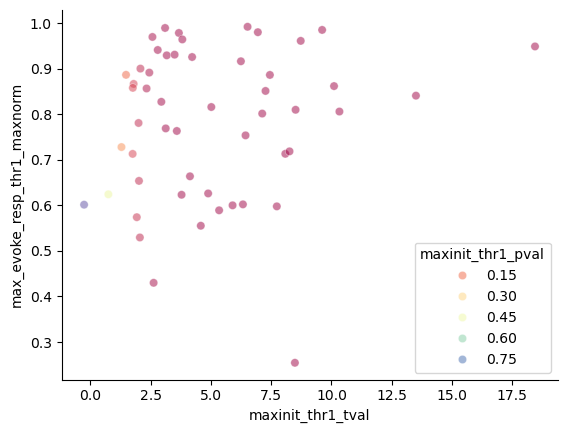

In [68]:
sns.scatterplot(data=evol_stats_synopsis_df, x='maxinit_thr1_tval', y='max_evoke_resp_thr1_maxnorm', hue='maxinit_thr1_pval', alpha=0.5, palette='Spectral')


In [ ]:
# find masks of evolution that succeed on thread 1 
success_str = "last - init p < 0.01"
BigGAN_success_explist = evol_stats_synopsis_df.query("lastinit_thr1_pval < 0.01")['Exp_id']
# find the corresponding masks in tuning stats
BigGAN_success_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id in @BigGAN_success_explist")
BigGAN_fail_mask_tuning_stats = tuning_stats_synopsis_df.query("Exp_id not in @BigGAN_success_explist")
tuning_stats_synopsis_df['is_BigGAN_evol_success'] = tuning_stats_synopsis_df['Exp_id'].isin(BigGAN_success_explist)
# find the corresponding masks in tuning stats
print(f"BigGAN success mask shape: {BigGAN_success_mask_tuning_stats.shape}")
print(f"BigGAN fail mask shape: {BigGAN_fail_mask_tuning_stats.shape}")

In [8]:
evol_stats_synopsis_df['last_resp_thr1_maxnorm'] = evol_stats_synopsis_df['last_resp_thr1'] / \
                                evol_stats_synopsis_df['max_evolref_resp']

In [7]:
list(evol_stats_synopsis_df)

['ChanQual',
 'Exp_collection',
 'Expi',
 'WebCam',
 'comments',
 'ephysFN',
 'expControlFN',
 'pref_chan',
 'pref_unit',
 'stim_size',
 'stimuli',
 'Animal',
 'init_resp_thr0',
 'last_resp_thr0',
 'max_resp_thr0',
 'max_evol_resp_thr0',
 'max_resp_thr0_blocknum',
 'lastinit_thr0_tval',
 'lastinit_thr0_pval',
 'lastinit_thr0_dof',
 'maxinit_thr0_tval',
 'maxinit_thr0_pval',
 'maxinit_thr0_dof',
 'init_resp_thr1',
 'last_resp_thr1',
 'max_resp_thr1',
 'max_evol_resp_thr1',
 'max_resp_thr1_blocknum',
 'lastinit_thr1_tval',
 'lastinit_thr1_pval',
 'lastinit_thr1_dof',
 'maxinit_thr1_tval',
 'maxinit_thr1_pval',
 'maxinit_thr1_dof',
 'mean_ref_resp',
 'max_ref_resp',
 'max_ref_resp_imgname',
 'max_evol_resp',
 'max_evol_resp_blockidx',
 'max_evolref_resp']

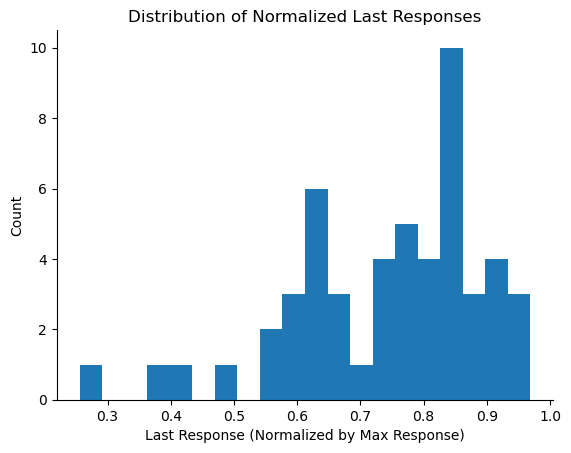

In [69]:
plt.figure()
plt.hist(evol_stats_synopsis_df['last_evoke_resp_thr1_maxnorm'], bins=20)
plt.xlabel('Last Response (Normalized by Max Response)')
plt.ylabel('Count')
plt.title('Distribution of Normalized Last Responses')
plt.show()

In [80]:
high_endpoint_expids = evol_stats_synopsis_df.query('last_evoke_resp_thr1_maxnorm > 0.85')['Exp_id']
low_endpoint_expids = evol_stats_synopsis_df.query('last_evoke_resp_thr1_maxnorm < 0.5')['Exp_id']

In [81]:
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


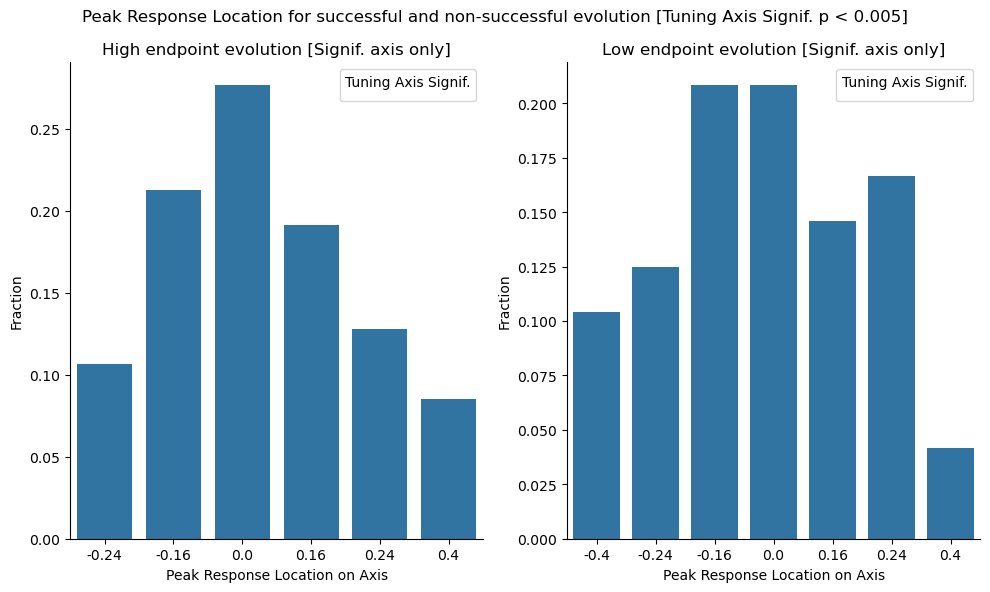

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


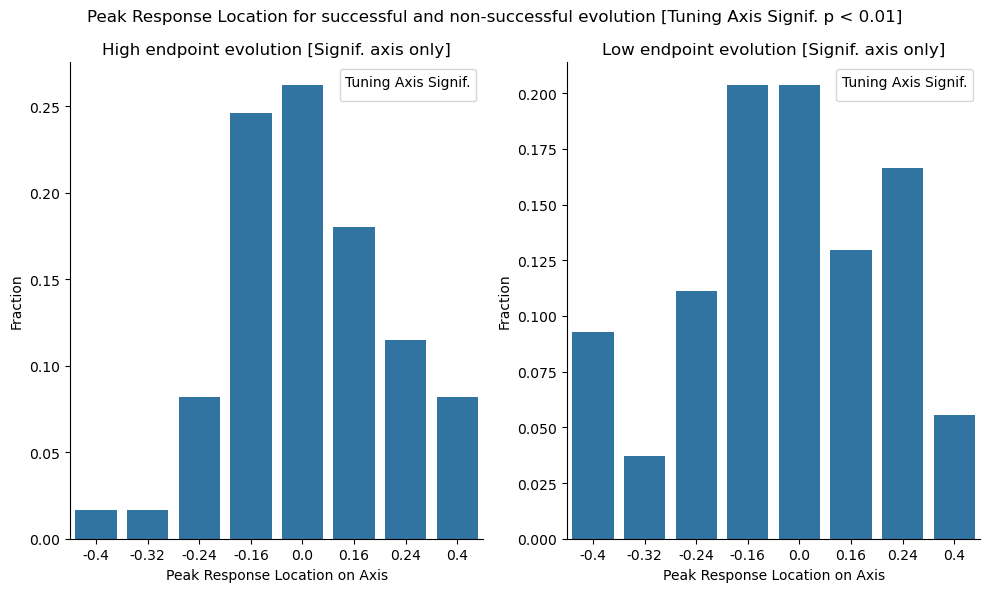

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


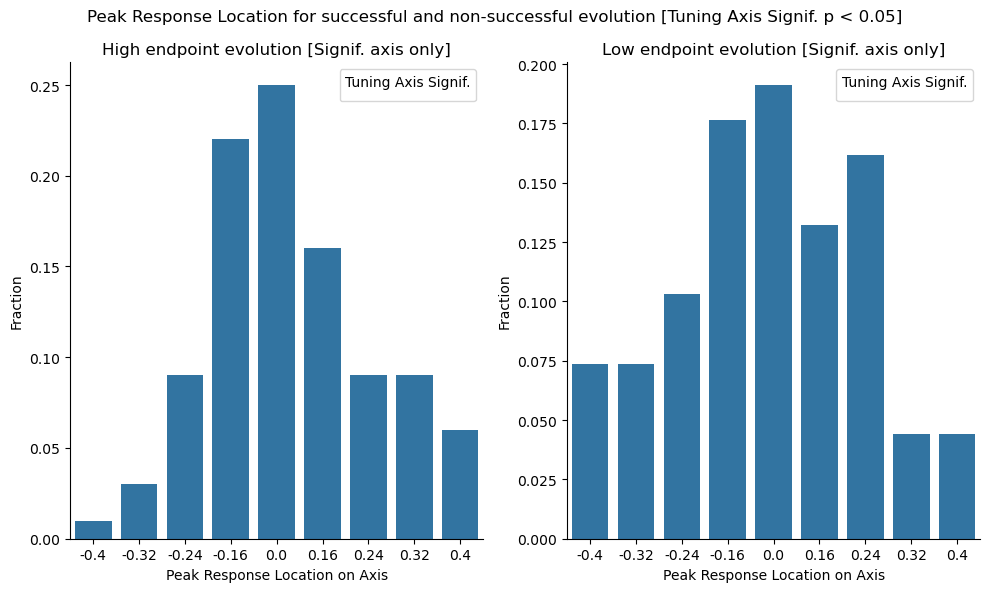

In [82]:
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
# [-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4] 
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @high_endpoint_expids  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('High endpoint evolution [Signif. axis only]')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @low_endpoint_expids  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Low endpoint evolution [Signif. axis only]')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_high_vs_low_endpoint_max_resp_lin_dist_countplot_signif_only_merge_p{pval_threshold}", figh=fig)
    plt.show() 

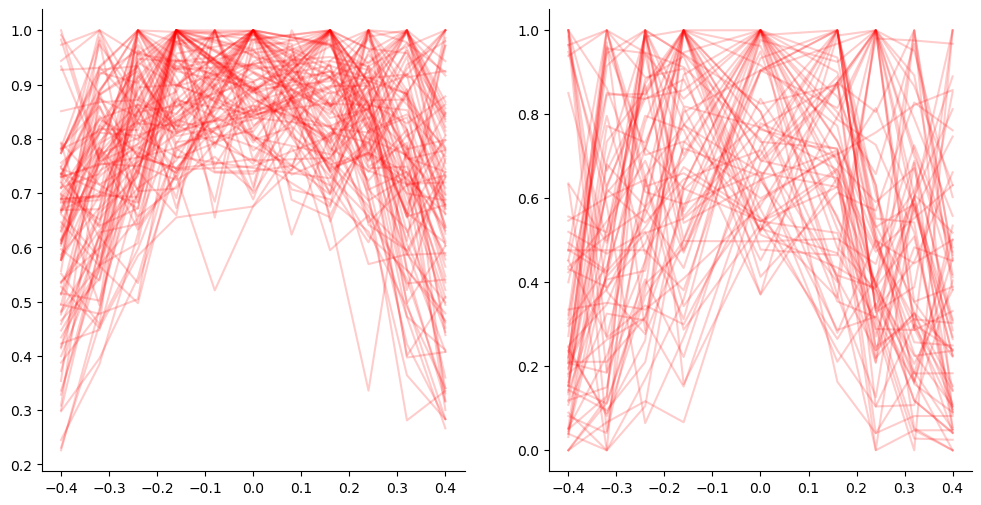

In [83]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @high_endpoint_expids  and  sig").iterrows():
    axs[0].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='red', alpha=0.2)

for i, row in tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @low_endpoint_expids  and  sig").iterrows():
    axs[1].plot(row.lin_dist_set, np.array(row.avg_resp_per_lin_dist) / max(row.avg_resp_per_lin_dist), '-', color='red', alpha=0.2)
plt.show()

In [18]:
high_endpoint_expids

1         Caos_2
2         Caos_3
3         Caos_4
4         Caos_5
5         Caos_6
9     Diablito_3
10    Diablito_4
13        Alfa_2
14        Alfa_3
15        Alfa_4
17        Alfa_6
18        Alfa_7
23       Alfa_12
24       Alfa_13
25       Alfa_14
27       Alfa_16
28       Alfa_17
30       Alfa_19
32       Alfa_21
33       Alfa_22
35       Alfa_24
37       Alfa_26
38        Beto_1
39        Beto_2
40        Beto_3
41        Beto_4
42        Beto_5
43        Beto_6
44        Beto_7
46        Beto_9
47       Beto_10
50       Beto_13
Name: Exp_id, dtype: object

In [ ]:
# tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist']
# use this to merge the bins at 0.08 and -0.08 to 0.0 ( this rarely happens  )
tuning_stats_synopsis_df['max_resp_lin_dist_bin'] = tuning_stats_synopsis_df['max_resp_lin_dist_bin'].apply(lambda x: 0.0 if x <=0.08 and x >= -0.08 else x)
# add a column for statistical significance
for pval_threshold in [0.005, 0.01, 0.05]:
    tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < pval_threshold
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[0], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[0].set_title('Successful evolution [Signif. axis only]')
    ax[0].set_xlabel('Peak Response Location on Axis')
    ax[0].set_ylabel('Fraction')
    ax[0].legend(title='Tuning Axis Signif.')

    sns.countplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist  and  sig"), 
                x='max_resp_lin_dist_bin', stat='proportion', ax=ax[1], )#bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
    ax[1].set_title('Non-successful evolution [Signif. axis only]')
    ax[1].set_xlabel('Peak Response Location on Axis')
    ax[1].set_ylabel('Fraction')
    ax[1].legend(title='Tuning Axis Signif.')

    fig.suptitle(f'Peak Response Location for successful and non-successful evolution [Tuning Axis Signif. p < {pval_threshold}]')
    plt.tight_layout()
    saveallforms(synfigdir, f"BigGAN_success_vs_fail_max_resp_lin_dist_countplot_signif_only_merge_p{pval_threshold}", figh=fig)
    plt.show() 

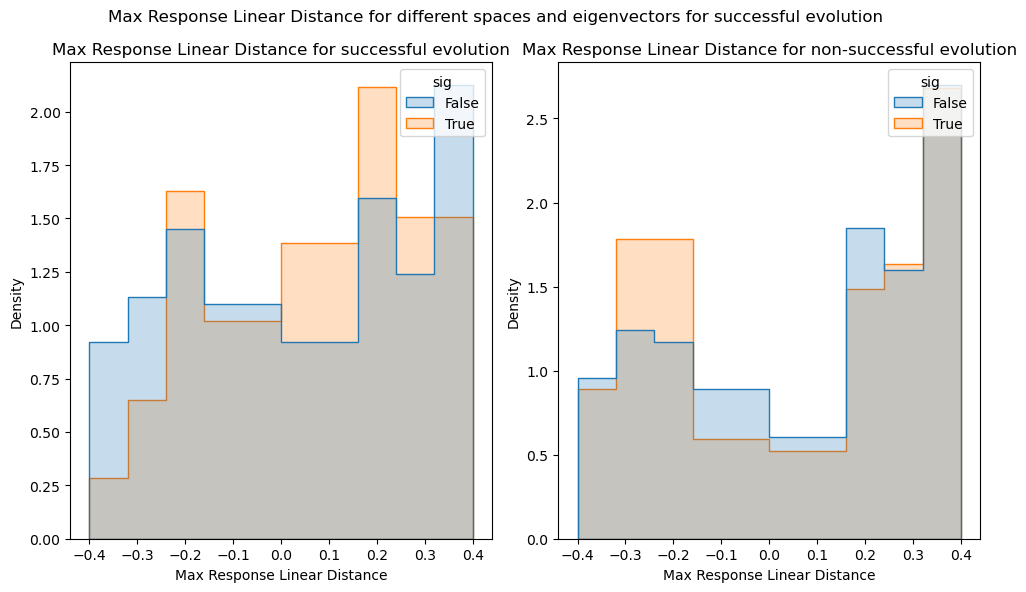

In [40]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]
sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[0], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[0].set_title('Max Response Linear Distance for successful evolution')
ax[0].set_xlabel('Max Response Linear Distance')
ax[0].set_ylabel('Density')

sns.histplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist"), x='max_resp_lin_dist', hue='sig', element='step', stat='density', common_norm=False, ax=ax[1], bins=[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4])
ax[1].set_title('Max Response Linear Distance for non-successful evolution')
ax[1].set_xlabel('Max Response Linear Distance')
ax[1].set_ylabel('Density')

# sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
#                 hue="prefchan", palette="Spectral",
#                 style='sig',  markers={True: "o", False: "."}, alpha=0.7)
# ax[1].set_title('noise space')
# ax[1].set_xlabel('Eigenvalue ID')
# ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

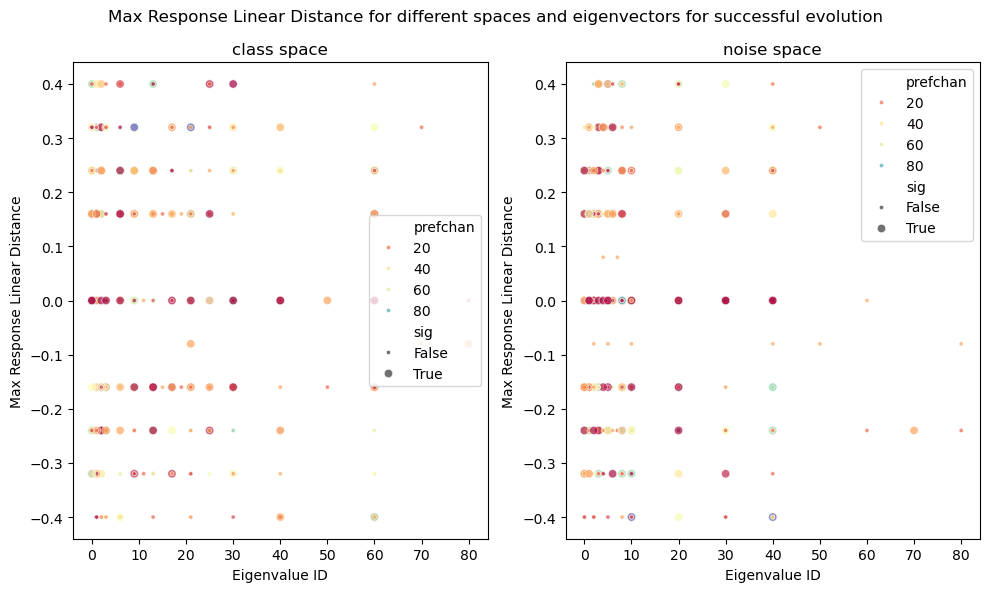

In [ ]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for successful evolution')
plt.tight_layout()
plt.show()
# %%

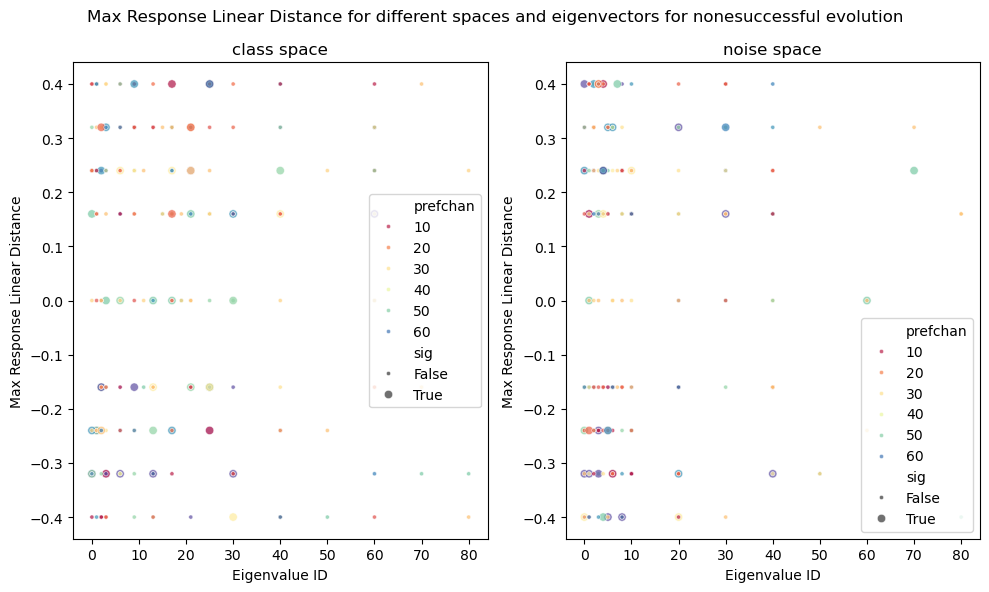

In [ ]:
import seaborn as sns
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
# add a column for statistical significance
tuning_stats_synopsis_df['sig'] = tuning_stats_synopsis_df['p_value'] < 0.005
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'class'"), x='eig_id', y='max_resp_lin_dist', ax=ax[0], 
                hue="prefchan", palette="Spectral", 
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[0].set_title('class space')
ax[0].set_xlabel('Eigenvalue ID')
ax[0].set_ylabel('Max Response Linear Distance')

sns.scatterplot(data=tuning_stats_synopsis_df[common_axis_mask].query("Exp_id not in @BigGAN_success_explist").query("space_name == 'noise'"), x='eig_id', y='max_resp_lin_dist', ax=ax[1], 
                hue="prefchan", palette="Spectral",
                style='sig',  markers={True: "o", False: "."}, alpha=0.7)
ax[1].set_title('noise space')
ax[1].set_xlabel('Eigenvalue ID')
ax[1].set_ylabel('Max Response Linear Distance')

fig.suptitle('Max Response Linear Distance for different spaces and eigenvectors for nonesuccessful evolution')
plt.tight_layout()
plt.show()
# %%

In [ ]:
tuning_stats_synopsis_df.lin_dist_set.iloc[0]


[-0.4, -0.32, -0.24, -0.16, 0.0, 0.16, 0.24, 0.32, 0.4]